In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
from rdkit import Chem
import numpy as np
import pandas as pd
from collections import defaultdict
import sys
import pickle
import os
sys.path.append('../')
sys.path.append('../data_processing/')

from openbabel import pybel
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
import torch
from tqdm import tqdm
import py3Dmol

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from data_processing.ligand import Ligand
from data_processing.utils import sample_probability, PP_TYPE_MAPPING
from script_utils import load_qm9_data

In [8]:
generated_path = '../lightning_logs/vp_bridge_egnn_QM9Dataset_2024-05-22_19_48_30.573332/reconstructed_mols'

## some mols in qm9 dataset have same smiles
- smiles can not be used as the unique identifier of the mol

# TODO:
**In dataset preprocessing, pp info of mols with same smiles are not correctly saved**

I did smt like this, but some smiles correspond to more than 2 mols, which causes iterated list...
```
    pp_info[smiles]['pp_atom_indices'] = [pp_info[smiles]['pp_atom_indices'], pp_atom_indices]
```

In [5]:
raw_path = '../../data/qm9/raw/gdb9.sdf'

In [6]:
with open('../../data/qm9/raw/uncharacterized.txt', 'r') as f:
    skip = [int(x.split()[0]) - 1 for x in f.read().split('\n')[9:-2]]

In [10]:
# suppl = Chem.SDMolSupplier(raw_path, removeHs=False)
# ref_mols = []
# smi_mol_map = defaultdict(list)
# skip_num = 0
# for i, rdmol in enumerate(tqdm(suppl)):
#     if i in skip:
#         skip_num += 1
#         continue

#     if rdmol is None:
#         skip_num += 1
#         continue
#     ref_mols.append(rdmol)
#     smi = Chem.MolToSmiles(rdmol)
#     smi_mol_map[smi].append(rdmol)

In [ ]:
len(ref_mols)

In [ ]:
len(smi_mol_map.keys())

In [9]:
# with open('../../data/qm9/metadata/smiles_rdmol_mapping.pkl', 'wb') as f:
#     pickle.dump(smi_mol_map, f)
    
    
with open('../../data/qm9/metadata/smiles_rdmol_mapping.pkl', 'rb') as f:
    smi_mol_map = pickle.load(f)

In [11]:
test_dataset, test_loader = load_qm9_data(root='../../data/qm9', split='test', batch_size=1)

In [12]:
len(test_dataset)

12944

In [11]:
mols = []
gen_map = defaultdict(list)
for file in tqdm(os.listdir(generated_path)):
    smi = file.split('.')[0]
    m = Chem.MolFromMolFile(os.path.join(generated_path, file))
    mols.append(m)
    gen_map[smi] = m

  0%|                                                                                                                                                                  | 0/9739 [00:00<?, ?it/s][22:52:51] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:52:51] Explicit valence for atom # 14 N, 4, is greater than permitted
[22:52:51] Explicit valence for atom # 9 N, 4, is greater than permitted
  1%|█                                                                                                                                                       | 65/9739 [00:00<00:14, 648.83it/s][22:52:51] Explicit valence for atom # 14 N, 4, is greater than permitted
[22:52:51] Explicit valence for atom # 16 N, 4, is greater than permitted
[22:52:51] Explicit valence for atom # 15 N, 4, is greater than permitted
[22:52:51] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:52:51] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:52:51] Explicit valence

[22:52:52] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 18 N, 4, is greater than permitted
  7%|██████████▉                                                                                                                                            | 703/9739 [00:01<00:13, 645.50it/s][22:52:52] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 2 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:52:52] Explicit valence for atom # 11 N, 4, is greater than permitte

 13%|███████████████████▌                                                                                                                                  | 1274/9739 [00:01<00:14, 602.60it/s][22:52:53] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 0 N, 4, is greater than permitted
[22:52:53] Explicit valence for atom # 15 N, 4, is greater than permitted
 1

[22:52:54] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 18 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 0 N, 4, is greater than permitted
 21%|███████████████████████████████▍                                                                                                                      | 2042/9739 [00:03<00:12, 629.05it/s][22:52:54] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 17 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:52:54] Explicit valence for atom # 20 N, 4, is greater than permitted

 28%|█████████████████████████████████████████▋                                                                                                            | 2703/9739 [00:04<00:11, 638.34it/s][22:52:55] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 11 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 26 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 0 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 14 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:52:55] Explicit valence for atom # 12 N, 4, is greater than permitted
 28%|██████████████████████████████████████████▋                                                                                                   

 35%|████████████████████████████████████████████████████▏                                                                                                 | 3387/9739 [00:05<00:08, 706.17it/s][22:52:56] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 21 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 0 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 2 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 8 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 0 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:56] Explicit valence for atom # 0 N, 4, is greater than permitted
[22

[22:52:57] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 9 N, 4, is greater than permitted
 42%|███████████████████████████████████████████████████████████████▎                                                                                      | 4112/9739 [00:06<00:08, 678.74it/s][22:52:57] Explicit valence for atom # 14 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 16 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 15 N, 4, is greater than permitted
[22:52:57] Explicit valence for atom # 8 N, 4, is greater than permitt

 48%|████████████████████████████████████████████████████████████████████████                                                                              | 4680/9739 [00:07<00:07, 672.02it/s][22:52:58] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 8 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 2 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:52:58] Explicit valence for atom # 21 N, 4, is greater than permitted
[2

[22:52:59] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 6 N, 4, is greater than permitted
 55%|██████████████████████████████████████████████████████████████████████████████████▋                                                                   | 5366/9739 [00:08<00:06, 664.16it/s][22:52:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 0 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:52:59] Explicit valence for atom # 21 N, 4, is greater than permitted
[22:

[22:53:00] Explicit valence for atom # 15 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 15 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 16 N, 4, is greater than permitted
 62%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 5990/9739 [00:09<00:05, 663.56it/s][22:53:00] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 18 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[22:53:00] Explicit valence for atom # 6 N, 4, is greater than permitted

[22:53:01] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 2 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 6 N, 4, is greater than permitted
 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 6686/9739 [00:10<00:04, 612.22it/s][22:53:01] Explicit valence for atom # 2 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 19 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 11 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 14 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:53:01] Explicit valence for atom # 19 N, 4, is greater than permitted

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 7258/9739 [00:11<00:03, 655.27it/s][22:53:02] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:53:02] Explicit valence for atom # 9 N, 4, is greater than permitted
 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 7325/9739 [00:11<00:03, 658.68it/s][22:53:02] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:53:02] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:53:02] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:53:02] Explicit valence for atom # 2 N, 4, is greater than permitted
[22:53:02] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:53:02] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:53:02] Explicit valence for 

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 7925/9739 [00:12<00:02, 747.33it/s][22:53:03] Explicit valence for atom # 5 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 3 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 15 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 15 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 0 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 2 N, 4, is greater than permitted
[22:53:03] Explicit valence for atom # 10 N, 4, is greater than permitted
 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 8569/9739 [00:13<00:01, 645.77it/s][22:53:04] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 10 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:53:04] Explicit valence for atom # 12 N, 4, is greater than permitted
 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 9286/9739 [00:14<00:00, 666.31it/s][22:53:05] Explicit valence for atom # 9 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 12 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 11 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 13 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 19 N, 4, is greater than permitted
[22:53:05] Explicit valence for atom # 10 N, 4, is greater than permitted

In [12]:
len(mols), len(gen_map.keys())

(9739, 9739)

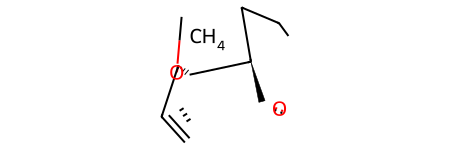

In [13]:
m = mols[8101]
m

In [14]:
rev_gen_map = {v:k for k, v in gen_map.items()}
smi = rev_gen_map[m]
smi

'[H]O[C@@]12C(=O)N([H])[C@]1([H])C([H])=C([H])C2([H])[H]'

In [15]:
v = py3Dmol.view()
v.addModel(open(os.path.join(generated_path, smi+'.sdf')).read())
v.setStyle({'model':0},{'stick':{'colorscheme':'greenCarbon','radius':.125}})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
repeated_ref_mol = 0
for smi in gen_map.keys():
    ref_mols = smi_mol_map[smi]
    if len(ref_mols) > 1:
        repeated_ref_mol += 1

repeated_ref_mol

14

In [20]:
one = test_dataset[0]
one

Data(x=[34, 8], pos=[34, 3], target_x=[34, 8], target_pos=[34, 3], Gt_mask=[34], ligand_name='[H]N([H])[C@]1([H])C(=O)OC([H])([H])C([H])([H])C1([H])[H]')

In [21]:
one.x

tensor([[0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0

In [22]:
x = one.x
x[~one.Gt_mask] = torch.rand_like(x[~one.Gt_mask])
x

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,

In [23]:
target_x = one.target_x[one.Gt_mask]

In [24]:
for batch in test_loader:
    if batch.ligand_name not in gen_map.keys():
        continue
    

TypeError: unhashable type: 'list'

In [17]:
with open('../../data/qm9/metadata/pp_info.pkl', 'rb') as f:
    pp_info = pickle.load(f)
pp_info

defaultdict(dict,
            {'[H]C([H])([H])[H]': {'pp_atom_indices': [[0]],
              'pp_positions': tensor([[-0.0127,  1.0858,  0.0080]]),
              'pp_types': tensor([[0., 1., 0., 0., 0., 0., 0., 0.]]),
              'pp_index': tensor([0]),
              'node_pp_index': tensor([ 0, -1, -1, -1, -1])},
             '[H]N([H])[H]': {'pp_atom_indices': [[0]],
              'pp_positions': tensor([[-0.0404,  1.0241,  0.0626]]),
              'pp_types': tensor([[0., 0., 0., 0., 0., 1., 0., 0.]]),
              'pp_index': tensor([0]),
              'node_pp_index': tensor([ 0, -1, -1, -1])},
             '[H]O[H]': {'pp_atom_indices': [[0]],
              'pp_positions': tensor([[-0.0344,  0.9775,  0.0076]]),
              'pp_types': tensor([[0., 0., 0., 0., 0., 1., 0., 0.]]),
              'pp_index': tensor([0]),
              'node_pp_index': tensor([ 0, -1, -1])},
             '[H]C#C[H]': {'pp_atom_indices': [[1], [0]],
              'pp_positions': tensor([[-0.5995, 

In [18]:
gen_pp_info = {k:v for k, v in pp_info.items() if k in gen_map.keys()}
gen_pp_info

{'[H]C([H])([H])[H]': {'pp_atom_indices': [[0]],
  'pp_positions': tensor([[-0.0127,  1.0858,  0.0080]]),
  'pp_types': tensor([[0., 1., 0., 0., 0., 0., 0., 0.]]),
  'pp_index': tensor([0]),
  'node_pp_index': tensor([ 0, -1, -1, -1, -1])},
 '[H]C([H])([H])OC([H])([H])C([H])([H])[H]': {'pp_atom_indices': [[2], [0]],
  'pp_positions': tensor([[ 0.6976, -0.4634,  1.1687],
          [-0.0052,  1.5087,  0.0331]]),
  'pp_types': tensor([[0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0.]]),
  'pp_index': tensor([0, 1]),
  'node_pp_index': tensor([ 1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1])},
 '[H]c1c([H])c([H])n([H])c1[H]': {'pp_atom_indices': [[0, 1, 2, 3, 4]],
  'pp_positions': tensor([[ 0.9399,  0.6931, -0.0030]]),
  'pp_types': tensor([[0., 0., 1., 0., 0., 0., 0., 0.]]),
  'pp_index': tensor([0]),
  'node_pp_index': tensor([ 0,  0,  0,  0,  0, -1, -1, -1, -1, -1])},
 '[H]C([H])([H])C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]': {'pp_atom_indices': [[4],


In [19]:
ref_pp_info = gen_pp_info[smi]
ref_pp_info

{'pp_atom_indices': [[7], [5], [2], [0]],
 'pp_positions': tensor([[ 1.0029, -0.3784,  2.2106],
         [-0.4256, -1.8655,  0.8235],
         [ 0.5058, -0.7965, -1.2231],
         [ 0.1112,  1.4347, -0.0951]]),
 'pp_types': tensor([[0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.]]),
 'pp_index': tensor([0, 1, 2, 3]),
 'node_pp_index': tensor([ 3, -1,  2, -1, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1])}

In [20]:
torch.argmax(ref_pp_info['pp_types'], dim=-1)

tensor([5, 3, 1, 5])

In [21]:
def extract_pp(ligand, num_class):
    pp_type_mapping = PP_TYPE_MAPPING

    atom_indice_list = []
    position_list = []
    pp_type_list = []
    pp_index_list = []

    for pp_node in ligand.graph.nodes:
        atom_indices = list([pp_node.atom_indices]) if type(pp_node.atom_indices)==int else list(sorted(pp_node.atom_indices))
        positions = pp_node.positions.squeeze()
        index = pp_node.index
        # types = [one_hot_encoding[type] for type in pp_node.types]
        types = pp_type_mapping[pp_node.types[0]]  # we can't have multiple types for one pharmacophore, so we just take the first one

        atom_indice_list.append(atom_indices)
        position_list.append(positions)
        pp_index_list.append(index)
        pp_type_list.append(types)

    '''
    # atom_indices_tensor = torch.tensor(atom_indice_list, dtype=torch.long)
    positions_tensor = torch.tensor(np.array(position_list), dtype=torch.float)
    # one_hot_pp_tensor = torch.nn.functional.one_hot(torch.tensor(pp_type_list, dtype=torch.long), num_classes=len(pp_type_mapping.keys())).to(torch.float)
    one_hot_pp_tensor = torch.nn.functional.one_hot(torch.tensor(np.array(pp_type_list), dtype=torch.long), num_classes=num_class).to(torch.float)
    pp_index_tensor = torch.tensor(np.array(pp_index_list), dtype=torch.long)
    '''
    
    positions_array = np.array(position_list)
    pp_type_array = np.array(pp_type_list, dtype=int)
    pp_index_array = np.array(pp_index_list, dtype=int)

    return atom_indice_list, positions_array, pp_type_array, pp_index_array

In [22]:
mol_path = os.path.join(generated_path, smi+'.sdf')
rdmol = Chem.MolFromMolFile(mol_path, sanitize=False)
pbmol = next(pybel.readfile("sdf", mol_path))

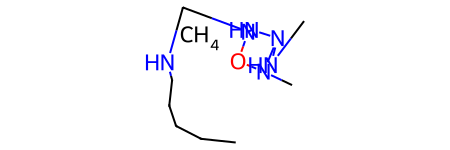

In [23]:
rdmol

In [40]:
ligand = Ligand(pbmol, rdmol, atom_positions=None, conformer_axis=None)

In [41]:
num_classes = len(PP_TYPE_MAPPING.keys())
pp_atom_indices, pp_positions, pp_types, pp_index = extract_pp(ligand, num_classes)
print(pp_types)

[2 1 1 1 5 5]


In [42]:
# torch.argmax(pp_types, dim=-1)

In [43]:
print(pp_positions)

[[ 0.25714 -0.012   -0.3772 ]
 [-1.5935   0.317    1.7564 ]
 [-0.2835  -2.5884  -0.6246 ]
 [-2.0676  -1.5987  -0.6766 ]
 [ 0.656   -0.5122   1.007  ]
 [-2.1167  -0.4375  -1.3047 ]]


In [44]:
# here we consider if each pp in the generated mol matches to any pp in the ref mol (score = match_num/len(gen_pp))
# we should consider if each pp in the ref mol is matched by any pp in the generated mol (score = match_num/len(ref_pp))

def pp_match_wrong(pp_types, pp_positions, ref_pp_info):
#     pps = torch.argmax(pp_types, dim=-1).numpy
    pps = pp_types
#     ref_pps = torch.argmax(ref_pp_info['pp_types'], dim=-1)

    ref_pps = np.argmax(ref_pp_info['pp_types'].numpy(), axis=-1)
    match = np.zeros_like(pps)
    for i, pp in enumerate(pps):
        pos = pp_positions[i]
        for j, ref_pp in enumerate(ref_pps):
            if pp == ref_pp:
                ref_pos = ref_pp_info['pp_positions'][j].numpy()
                dist = np.sqrt(np.sum((pos - ref_pos) ** 2))
#                 print(f'pp {i} and ref {j} are of same type {pp}. their dist is {dist}')
                if dist < 1.2:
                    match[i] += 1
#                     print('pp {i} and ref {j} match')
#                 print('\n')
    return match

In [52]:
def pp_match(pp_types, pp_positions, ref_pp_info):
#     pps = torch.argmax(pp_types, dim=-1).numpy
    pps = pp_types
#     ref_pps = torch.argmax(ref_pp_info['pp_types'], dim=-1)

    ref_pps = np.argmax(ref_pp_info['pp_types'].numpy(), axis=-1)
    match = np.zeros_like(ref_pps)
#     print(pps.shape, ref_pps.shape, match.shape)
    for i, ref_pp in enumerate(ref_pps):
        ref_pos = ref_pp_info['pp_positions'][i].numpy()
        for j, pp in enumerate(pps):
            if pp == ref_pp:
                pos = pp_positions[j]
                dist = np.sqrt(np.sum((pos - ref_pos) ** 2))
#                 print(f'pp {i} and ref {j} are of same type {pp}. their dist is {dist}')
                if dist < 1.2:
                    match[i] += 1
#                     print('pp {i} and ref {j} match')
#                 print('\n')
    return match

In [53]:
match = pp_match(pp_types, pp_positions, ref_pp_info)
match

array([0, 0, 0, 1])

# TODO:
1. **To address the iterated list issue, for now we use the last element (which is appended to the list at last)**
2. Do not filter the extrated pps!!!

In [54]:
num_classes = len(PP_TYPE_MAPPING.keys())
score_dict = {}
match_dict = {}
for file in tqdm(os.listdir(generated_path)):
    smi = file.split('.')[0]
    mol_path = os.path.join(generated_path, smi+'.sdf')
    rdmol = Chem.MolFromMolFile(mol_path, sanitize=False)
    pbmol = next(pybel.readfile("sdf", mol_path))
    try:
        ligand = Ligand(pbmol, rdmol, atom_positions=None, conformer_axis=None, filtering=False)
    except:
        print('ligand init failed')
    pp_atom_indices, pp_positions, pp_types, pp_index = extract_pp(ligand, num_classes)
    
    ref_pp_info = gen_pp_info[smi]
    if isinstance(ref_pp_info['pp_types'], list):
        print(ref_pp_info)
        ref_pp_info = {k:v[-1] for k, v in ref_pp_info.items()}
    
    match = pp_match(pp_types, pp_positions, ref_pp_info)
    match_dict[smi] = match
    score = np.mean(match)
    score_dict[smi] = score

  0%|▍                                                                                                                                                       | 32/9739 [00:00<01:07, 143.65it/s]

ligand init failed
ligand init failed


  1%|▉                                                                                                                                                       | 62/9739 [00:00<01:06, 145.59it/s][23:58:59] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 12 N, 4, is greater than permitted
  1%|█▏                                                                                                                                                      | 78/9739 [00:00<01:04, 150.39it/s][23:58:59] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 3 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


  1%|█▋                                                                                                                                                     | 110/9739 [00:00<01:04, 148.37it/s][23:58:59] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:58:59] Explicit valence for atom # 17 N, 4, is greater than permitted
  1%|█▉                                                                                                                                                     | 125/9739 [00:00<01:08, 139.37it/s][23:58:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 1 N, 4, is greater than permitted
  1%|██▏                                                                                                                                                    | 140/9739 [00:00<

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


  2%|██▍                                                                                                                                                    | 154/9739 [00:01<01:14, 128.30it/s][23:59:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 6 N, 4, is greater than permitted
  2%|██▊                                                                                                                                                    | 183/9739 [00:01<01:10, 136.34it/s][23:59:00] Explicit valence for atom # 3 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 10 N, 4, is greater than permitted
  2%|███▎                                                                                                                                                   | 212/9739 [00:01<01:10, 136.09it/s][23:59:00] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 15 N, 4, is greater than permitted
  2%|███▌                                                                                                                                           

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:00] Explicit valence for atom # 11 N, 4, is greater than permitted
  3%|███▊                                                                                                                                                   | 246/9739 [00:01<01:04, 147.93it/s][23:59:00] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:00] Explicit valence for atom # 4 N, 4, is greater than permitted
  3%|████                                                                                                                                                   | 261/9739 [00:01<01:05, 144.58it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:00] Explicit valence for atom # 2 N, 4, is greater than permitted
  3%|████▎                                                                                                                                                  | 278/9739 [00:01<01:03, 148.04it/s][23:59:01] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 13 N, 4, is greater than permitted
  3%|████▌                                                                                                                                                  | 293/9739 [00:02<01:04, 146.19it/s][23:59:01] Explicit valence for atom # 21 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 4 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


  3%|█████▏                                                                                                                                                 | 338/9739 [00:02<01:07, 138.39it/s][23:59:01] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 11 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


  4%|█████▍                                                                                                                                                 | 353/9739 [00:02<01:08, 137.02it/s][23:59:01] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 4 N, 4, is greater than permitted
  4%|█████▊                                                                                                                                                 | 373/9739 [00:02<01:00, 154.05it/s][23:59:01] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 6 N, 4, is greater than permitted
  4%|██████                                                                                                                                                 | 394/9739 [00:02<00:5

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:01] Explicit valence for atom # 4 N, 4, is greater than permitted
  4%|██████▍                                                                                                                                                | 415/9739 [00:02<00:51, 179.66it/s][23:59:01] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:01] Explicit valence for atom # 8 N, 4, is greater than permitted
  4%|██████▋                                                                                                                                                | 435/9739 [00:02<00:50, 184.35it/s]

{'pp_atom_indices': [[[2, 3, 4, 5, 6, 7], [1], [0]], [[2, 3, 4, 5, 6, 7], [0], [1]]], 'pp_positions': [tensor([[-5.8600e-02,  2.7754e+00,  1.8167e-02],
        [ 2.6700e-02,  1.0100e-02,  2.5000e-03],
        [ 3.9000e-03, -1.1929e+00, -3.6000e-03]]), tensor([[-0.0126,  2.7761,  0.0176],
        [ 0.0329, -1.1924, -0.0037],
        [-0.0229,  0.0095,  0.0033]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]])], 'pp_index': [tensor([0, 1, 2]), tensor([0, 1, 2])], 'node_pp_index': [tensor([ 2,  1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1]), tensor([ 1,  2,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1])]}
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:02] Explicit valence for atom # 19 N, 4, is greater than permitted
  5%|███████                                                                                                                                                | 454/9739 [00:03<00:57, 162.35it/s][23:59:02] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 12 N, 4, is greater than permitted
  5%|███████▎                                                                                                                                               | 471/9739 [00:03<01:00, 152.12it/s][23:59:02] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 5 N, 4, is greater than permitted
  5%|███████▌                                                                                                                                               | 487/9739 [00:03<

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:02] Explicit valence for atom # 11 N, 4, is greater than permitted
  5%|███████▊                                                                                                                                               | 502/9739 [00:03<01:05, 141.32it/s][23:59:02] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 10 N, 4, is greater than permitted
  5%|████████                                                                                                                                               | 517/9739 [00:03<01:05, 140.79it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


  5%|████████▏                                                                                                                                              | 532/9739 [00:03<01:05, 141.64it/s][23:59:02] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 12 N, 4, is greater than permitted
  6%|████████▌                                                                                                                                              | 549/9739 [00:03<01:01, 149.28it/s][23:59:02] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:02] Explicit valence for atom # 13 N, 4, is greater than permitted
  6%|████████▊                                                                                                                                              | 565/9739 [00:03<01:00, 152.08it/s][23:59:02] Explicit valence for atom # 8 N, 4, is greater

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:03] Explicit valence for atom # 2 N, 4, is greater than permitted
  6%|█████████                                                                                                                                              | 584/9739 [00:03<00:56, 162.76it/s][23:59:03] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 8 N, 4, is greater than permitted
  6%|█████████▎                                                                                                                                             | 602/9739 [00:04<00:55, 164.92it/s][23:59:03] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 14 N, 4, is greater than permitted
  6%|█████████▌                                                                                                                                             | 619/9739 [00:04<00

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:03] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 10 N, 4, is greater than permitted
  7%|█████████▊                                                                                                                                             | 636/9739 [00:04<00:54, 165.82it/s][23:59:03] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 1 N, 4, is greater than permitted
  7%|██████████                                                                                                                                             | 653/9739 [00:04<00:57, 157.54it/s][23:59:03] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


  7%|██████████▎                                                                                                                                            | 669/9739 [00:04<00:57, 156.86it/s][23:59:03] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 18 N, 4, is greater than permitted
  7%|██████████▉                                                                                                                                            | 703/9739 [00:04<01:00, 148.31it/s]

ligand init failed
ligand init failed


[23:59:03] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 13 N, 4, is greater than permitted
  7%|███████████▏                                                                                                                                           | 719/9739 [00:04<01:00, 147.91it/s][23:59:03] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:03] Explicit valence for atom # 11 N, 4, is greater than permitted
  8%|███████████▍                                                                                                                                           | 736/9739 [00:04<00:59, 152.28it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:04] Explicit valence for atom # 9 N, 4, is greater than permitted
  8%|███████████▋                                                                                                                                           | 752/9739 [00:05<00:59, 150.37it/s][23:59:04] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 6 N, 4, is greater than permitted
  8%|███████████▉                                                                                                                                           | 768/9739 [00:05<01:01, 146.94it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


  8%|████████████▏                                                                                                                                          | 783/9739 [00:05<01:01, 146.11it/s][23:59:04] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 2 N, 4, is greater than permitted
  8%|████████████▌                                                                                                                                          | 813/9739 [00:05<01:03, 140.72it/s][23:59:04] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 12 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:04] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 3 N, 4, is greater than permitted
  9%|████████████▊                                                                                                                                          | 828/9739 [00:05<01:03, 140.11it/s][23:59:04] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 4 N, 4, is greater than permitted
  9%|█████████████                                                                                                                                          | 843/9739 [00:05<01:05, 135.31it/s][23:59:04] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:04] Explicit valence fo

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:04] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:04] Explicit valence for atom # 18 N, 4, is greater than permitted
  9%|█████████████▌                                                                                                                                         | 875/9739 [00:05<01:02, 140.88it/s][23:59:04] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 5 N, 4, is greater than permitted
  9%|█████████████▊                                                                                                                                         | 890/9739 [00:06<01:02, 142.70it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:05] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 13 N, 4, is greater than permitted
  9%|██████████████                                                                                                                                         | 908/9739 [00:06<00:57, 152.67it/s][23:59:05] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 14 N, 4, is greater than permitted
 10%|██████████████▍                                                                                                                                        | 928/9739 [00:06<00:54, 161.52it/s][23:59:05] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 0 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:05] Explicit valence for atom # 6 N, 4, is greater than permitted
 10%|██████████████▋                                                                                                                                        | 948/9739 [00:06<00:51, 171.99it/s][23:59:05] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 12 N, 4, is greater than permitted
 10%|███████████████▎                                                                                                                                       | 988/9739 [00:06<00:47, 184.37it/s][23:59:05] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:05] Explicit valence for atom # 3 N, 4, is greater than permitted
 10%|███████████████▌                                                                                                                                      | 1008/9739 [00:06<00:46, 188.34it/s][23:59:05] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 7 N, 4, is greater than permitted
 11%|████████████████▏                                                                                                                                     | 1049/9739 [00:06<00:44, 194.61it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:05] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:05] Explicit valence for atom # 5 N, 4, is greater than permitted
 11%|████████████████▍                                                                                                                                     | 1069/9739 [00:06<00:44, 193.38it/s][23:59:06] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 14 N, 4, is greater than permitted
 11%|████████████████▊                                                                                                                                     | 1089/9739 [00:07<00:45, 189.54it/s][23:59:06] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 16 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 12%|█████████████████▎                                                                                                                                    | 1127/9739 [00:07<00:49, 174.54it/s][23:59:06] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 16 N, 4, is greater than permitted
 12%|█████████████████▋                                                                                                                                    | 1145/9739 [00:07<00:49, 175.30it/s][23:59:06] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 20 N, 4, is greater than permitted
 12%|█████████████████▉                                                                                                                                    | 1163/9739 [00:07<00:48, 175.15it/s][23:59:06] Explicit valence for atom # 2 N, 4, is greate

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 12%|██████████████████▏                                                                                                                                   | 1181/9739 [00:07<00:51, 167.63it/s][23:59:06] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 10 N, 4, is greater than permitted
 12%|██████████████████▍                                                                                                                                   | 1198/9739 [00:07<00:53, 159.63it/s][23:59:06] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:06] Explicit valence for

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:06] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:06] Explicit valence for atom # 16 N, 4, is greater than permitted
 13%|██████████████████▉                                                                                                                                   | 1231/9739 [00:07<00:56, 150.48it/s][23:59:07] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 7 N, 4, is greater than permitted
 13%|███████████████████▏                                                                                                                                  | 1247/9739 [00:08<00:56, 148.99it/s][23:59:07] Explicit valence for atom # 3 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:07] Explicit valence for atom # 13 N, 4, is greater than permitted
 13%|███████████████████▍                                                                                                                                  | 1262/9739 [00:08<00:58, 144.07it/s][23:59:07] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 9 N, 4, is greater than permitted
 13%|███████████████████▋                                                                                                                                  | 1278/9739 [00:08<00:57, 147.15it/s][23:59:07] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 13 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 13%|███████████████████▉                                                                                                                                  | 1296/9739 [00:08<00:54, 156.32it/s][23:59:07] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 4 N, 4, is greater than permitted
 14%|████████████████████▎                                                                                                                                 | 1318/9739 [00:08<00:48, 172.85it/s][23:59:07] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 15 N, 4, is greater than permitted
 14%|████████████████████▌                                                                             

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:07] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 0 N, 4, is greater than permitted
 14%|█████████████████████▏                                                                                                                                | 1375/9739 [00:08<00:50, 166.99it/s][23:59:07] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:07] Explicit valence for atom # 6 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:07] Explicit valence for atom # 13 N, 4, is greater than permitted
 14%|█████████████████████▋                                                                                                                                | 1410/9739 [00:09<00:49, 167.21it/s][23:59:08] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


 15%|█████████████████████▉                                                                                                                                | 1427/9739 [00:09<00:50, 165.52it/s][23:59:08] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:08] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:08] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:08] Explicit valence for atom # 9 N, 4, is greater than permitted
 15%|██████████████████████▏                                                                                                                               | 1444/9739 [00:09<00:53, 154.80it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


 15%|██████████████████████▍                                                                                                                               | 1460/9739 [00:09<01:00, 137.52it/s][23:59:08] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:08] Explicit valence for atom # 6 N, 4, is greater than permitted
 15%|██████████████████████▋                                                                                                                               | 1475/9739 [00:09<01:02, 131.79it/s][23:59:08] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:08] Explicit valence for atom # 4 N, 4, is greater than permitted
 15%|██████████████████████▉                                                                                                                               | 1491/9739 [00:09<00:59, 138.42it/s][23:59:08] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:08] Explicit valence for atom # 1 N, 4, is greater 

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:08] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:08] Explicit valence for atom # 15 N, 4, is greater than permitted
 16%|███████████████████████▌                                                                                                                              | 1527/9739 [00:09<00:55, 148.16it/s][23:59:08] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:09] Explicit valence for atom # 7 N, 4, is greater than permitted
 16%|███████████████████████▊                                                                                                                              | 1543/9739 [00:09<00:56, 144.84it/s][23:59:09] Explicit valence for atom # 6 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 16%|████████████████████████▌                                                                                                                             | 1592/9739 [00:10<00:53, 151.84it/s][23:59:09] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:09] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:09] Explicit valence for atom # 16 N, 4, is greater than permitted
 17%|████████████████████████▊                                                                                                                             | 1610/9739 [00:10<00:51, 158.57it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:09] Explicit valence for atom # 11 N, 4, is greater than permitted
 17%|█████████████████████████▎                                                                                                                            | 1642/9739 [00:10<00:52, 154.64it/s][23:59:09] Explicit valence for atom # 13 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


[23:59:09] Explicit valence for atom # 9 N, 4, is greater than permitted
 17%|█████████████████████████▌                                                                                                                            | 1660/9739 [00:10<00:50, 161.00it/s][23:59:09] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:09] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:09] Explicit valence for atom # 1 N, 4, is greater than permitted
 17%|█████████████████████████▊                                                                                                                            | 1677/9739 [00:10<00:50, 160.93it/s][23:59:09] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:09] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:09] Explicit valence for atom # 3 N, 4, is greater than permitted
 17%|██████████████████████████                                                                        

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:09] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 20 N, 4, is greater than permitted
 18%|██████████████████████████▌                                                                                                                           | 1728/9739 [00:11<00:49, 161.78it/s]

ligand init failed
ligand init failed
ligand init failed


 18%|██████████████████████████▉                                                                                                                           | 1745/9739 [00:11<00:58, 136.87it/s][23:59:10] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 11 N, 4, is greater than permitted
 18%|███████████████████████████▏                                                                                                                          | 1763/9739 [00:11<00:54, 145.87it/s][23:59:10] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 4 N, 4, is greater than permitted
 18%|███████████████████████████▍                                                                                                                          | 1779/9739 [00:11<

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:10] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 4 N, 4, is greater than permitted
 19%|███████████████████████████▉                                                                                                                          | 1815/9739 [00:11<00:50, 157.92it/s][23:59:10] Explicit valence for atom # 6 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 19%|████████████████████████████▏                                                                                                                         | 1832/9739 [00:11<00:50, 155.52it/s][23:59:10] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:10] Explicit valence for atom # 6 N, 4, is greater than permitted
 19%|████████████████████████████▌                                                                                                                         | 1851/9739 [00:11<00:48, 163.29it/s][23:59:11] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 9 N, 4, is greater than permitted
 19%|████████████████████████████▊                                                                                                                         | 1870/9739 [00:12<00:46, 169.68it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 20%|█████████████████████████████▍                                                                                                                        | 1910/9739 [00:12<00:43, 180.93it/s][23:59:11] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 2 N, 4, is greater than permitted
 20%|█████████████████████████████▋                                                                                                                        | 1929/9739 [00:12<00:52, 148.08it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:11] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 22 N, 4, is greater than permitted
 20%|█████████████████████████████▉                                                                                                                        | 1945/9739 [00:12<00:52, 148.85it/s]

ligand init failed
ligand init failed
ligand init failed


 20%|██████████████████████████████▏                                                                                                                       | 1961/9739 [00:12<00:54, 141.50it/s][23:59:11] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 8 N, 4, is greater than permitted
 20%|██████████████████████████████▍                                                                                                                       | 1976/9739 [00:12<00:55, 141.06it/s][23:59:11] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:11] Explicit valence for atom # 7 N, 4, is greater than permitted
 20%|██████████████████████████████▋                                                                                                                       | 1991/9739 [00:12<00:55, 140.33it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:12] Explicit valence for atom # 4 N, 4, is greater than permitted
 21%|██████████████████████████████▉                                                                                                                       | 2006/9739 [00:13<00:57, 134.94it/s][23:59:12] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:12] Explicit valence for atom # 12 N, 4, is greater than permitted
 21%|███████████████████████████████▏                                                                                                                      | 2021/9739 [00:13<00:56, 136.33it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:12] Explicit valence for atom # 18 N, 4, is greater than permitted
 21%|███████████████████████████████▎                                                                                                                      | 2035/9739 [00:13<01:01, 126.16it/s][23:59:12] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:12] Explicit valence for atom # 6 N, 4, is greater than permitted
 21%|███████████████████████████████▌                                                                                                                      | 2049/9739 [00:13<00:59, 129.03it/s][23:59:12] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:12] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:12] Explicit valence for atom # 7 N, 4, is greater than permitted
 21%|███████████████████████████████▊                                                                                                                      | 2063/9739 [00:13<01:00, 126.55it/s][23:59:12] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:12] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:12] Explicit valence for atom # 7 N, 4, is greater than permitted
 21%|███████████████████████████████▉                                                                                                                      | 2077/9739 [00:13<00:59, 127.72it/s][23:59:12] Explicit valence for atom # 20 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 22%|████████████████████████████████▍                                                                                                                     | 2103/9739 [00:13<01:05, 115.78it/s][23:59:12] Explicit valence for atom # 18 N, 4, is greater than permitted


ligand init failed
ligand init failed


[23:59:13] Explicit valence for atom # 0 N, 4, is greater than permitted
 22%|████████████████████████████████▌                                                                                                                     | 2115/9739 [00:13<01:15, 100.89it/s][23:59:13] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:13] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:13] Explicit valence for atom # 4 N, 4, is greater than permitted
 22%|████████████████████████████████▊                                                                                                                     | 2129/9739 [00:14<01:09, 109.45it/s][23:59:13] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:13] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:13] Explicit valence for atom # 13 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 22%|█████████████████████████████████                                                                                                                     | 2145/9739 [00:14<01:02, 121.84it/s][23:59:13] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:13] Explicit valence for atom # 12 N, 4, is greater than permitted
 22%|█████████████████████████████████▍                                                                                                                    | 2173/9739 [00:14<00:59, 127.06it/s][23:59:13] Explicit valence for atom # 19 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


 23%|█████████████████████████████████▉                                                                                                                    | 2203/9739 [00:14<01:06, 113.27it/s][23:59:13] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:13] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:13] Explicit valence for atom # 9 N, 4, is greater than permitted
 23%|██████████████████████████████████▏                                                                                                                   | 2216/9739 [00:14<01:08, 109.60it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


 23%|██████████████████████████████████▎                                                                                                                   | 2228/9739 [00:14<01:12, 102.94it/s][23:59:14] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:14] Explicit valence for atom # 6 N, 4, is greater than permitted
 23%|██████████████████████████████████▌                                                                                                                   | 2241/9739 [00:15<01:10, 106.68it/s][23:59:14] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:14] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:14] Explicit valence for atom # 16 N, 4, is greater than permitted
 23%|██████████████████████████████████▋                                                                                                                   | 2254/9739 [00:15<01:06, 112.34it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 23%|██████████████████████████████████▉                                                                                                                   | 2267/9739 [00:15<01:04, 116.57it/s][23:59:14] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:14] Explicit valence for atom # 17 N, 4, is greater than permitted
 23%|███████████████████████████████████                                                                                                                   | 2280/9739 [00:15<01:02, 119.13it/s][23:59:14] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:14] Explicit valence for atom # 21 N, 4, is greater than permitted
 24%|███████████████████████████████████▎                                                                                                                  | 2293/9739 [00:15<01:03, 116.37it/s][23:59:14] Explicit valence for atom # 4 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 24%|████████████████████████████████████                                                                                                                  | 2339/9739 [00:15<01:10, 105.05it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:15] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 13 N, 4, is greater than permitted
 24%|████████████████████████████████████▏                                                                                                                 | 2350/9739 [00:16<01:10, 105.54it/s][23:59:15] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 12 N, 4, is greater than permitted
 24%|████████████████████████████████████▍                                                                                                                 | 2363/9739 [00:16<01:06, 110.81it/s][23:59:15] Explicit valence for atom # 7 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 25%|████████████████████████████████████▊                                                                                                                 | 2387/9739 [00:16<01:09, 106.11it/s][23:59:15] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 21 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 9 N, 4, is greater than permitted
 25%|████████████████████████████████████▉                                                                                                                 | 2399/9739 [00:16<01:07, 108.57it/s][23:59:15] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 16 N, 4, is greater than permitted
 25%|█████████████████████████████████████▏                                                          

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 25%|█████████████████████████████████████▊                                                                                                                | 2453/9739 [00:16<00:58, 125.37it/s]

ligand init failed
ligand init failed


[23:59:15] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:15] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 7 N, 4, is greater than permitted
 25%|██████████████████████████████████████▏                                                                                                               | 2483/9739 [00:17<00:59, 122.38it/s][23:59:16] Explicit valence for atom # 1 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 26%|██████████████████████████████████████▍                                                                                                               | 2496/9739 [00:17<00:58, 123.97it/s][23:59:16] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 21 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 8 N, 4, is greater than permitted
 26%|██████████████████████████████████████▋                                                                                                               | 2513/9739 [00:17<00:53, 133.99it/s][23:59:16] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:16] Explicit valence 

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:16] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 10 N, 4, is greater than permitted
 26%|███████████████████████████████████████▍                                                                                                              | 2564/9739 [00:17<00:46, 155.05it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:16] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:16] Explicit valence for atom # 1 N, 4, is greater than permitted
 27%|████████████████████████████████████████                                                                                                              | 2601/9739 [00:17<00:45, 158.24it/s]

ligand init failed
ligand init failed
ligand init failed


 27%|█████████████████████████████████████████                                                                                                             | 2664/9739 [00:18<00:51, 137.45it/s][23:59:17] Explicit valence for atom # 2 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


 28%|█████████████████████████████████████████▍                                                                                                            | 2691/9739 [00:18<00:55, 126.31it/s][23:59:17] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:17] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:17] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:17] Explicit valence for atom # 13 N, 4, is greater than permitted
 28%|█████████████████████████████████████████▉                                                                                                            | 2720/9739 [00:18<00:53, 131.64it/s][23:59:17] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:17] Explicit valence for atom # 4 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 28%|██████████████████████████████████████████                                                                                                            | 2734/9739 [00:18<00:53, 131.22it/s][23:59:17] Explicit valence for atom # 26 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 0 N, 4, is greater than permitted
 28%|██████████████████████████████████████████▎                                                                                                           | 2748/9739 [00:19<00:53, 131.11it/s][23:59:18] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 5 N, 4, is greater than permitted
 28%|██████████████████████████████████████████▌                                                                                                           | 2762/9739 [00:19<00:55, 124.99it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:18] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 11 N, 4, is greater than permitted
 29%|███████████████████████████████████████████▏                                                                                                          | 2802/9739 [00:19<00:55, 124.88it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:18] Explicit valence for atom # 8 N, 4, is greater than permitted
 29%|███████████████████████████████████████████▌                                                                                                          | 2830/9739 [00:19<00:53, 128.23it/s][23:59:18] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 16 N, 4, is greater than permitted
 29%|███████████████████████████████████████████▊                                                                                                          | 2844/9739 [00:19<00:52, 131.47it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:18] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 5 N, 4, is greater than permitted
 29%|████████████████████████████████████████████                                                                                                          | 2860/9739 [00:19<00:49, 137.79it/s][23:59:18] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:18] Explicit valence for atom # 7 N, 4, is greater than permitted
 30%|████████████████████████████████████████████▎                                                                                                         | 2875/9739 [00:19<00:48, 140.97it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


 30%|████████████████████████████████████████████▋                                                                                                         | 2904/9739 [00:20<00:50, 134.97it/s][23:59:19] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 9 N, 4, is greater than permitted
 30%|█████████████████████████████████████████████▏                                                                                                        | 2932/9739 [00:20<00:50, 134.14it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:19] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 15 N, 4, is greater than permitted
 30%|█████████████████████████████████████████████▍                                                                                                        | 2948/9739 [00:20<00:48, 139.18it/s][23:59:19] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 3 N, 4, is greater than permitted
 30%|█████████████████████████████████████████████▌                                                                                                        | 2962/9739 [00:20<00:49, 138.24it/s][23:59:19] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:19] Explicit valence fo

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:19] Explicit valence for atom # 0 N, 4, is greater than permitted
 31%|█████████████████████████████████████████████▊                                                                                                        | 2978/9739 [00:20<00:46, 143.87it/s][23:59:19] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 22 N, 4, is greater than permitted
 31%|██████████████████████████████████████████████                                                                                                        | 2993/9739 [00:20<00:47, 141.71it/s][23:59:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:19] Explicit valence for atom # 19 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 31%|██████████████████████████████████████████████▎                                                                                                       | 3008/9739 [00:20<00:48, 137.98it/s][23:59:20] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 12 N, 4, is greater than permitted
 31%|██████████████████████████████████████████████▊                                                                                                       | 3039/9739 [00:21<00:46, 144.44it/s][23:59:20] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 3 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:20] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 5 N, 4, is greater than permitted
 31%|███████████████████████████████████████████████                                                                                                       | 3055/9739 [00:21<00:44, 148.82it/s][23:59:20] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 0 N, 4, is greater than permitted
 32%|███████████████████████████████████████████████▎                                                                                                      | 3074/9739 [00:21<00:42, 158.58it/s][23:59:20] Explicit valence fo

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 32%|███████████████████████████████████████████████▌                                                                                                      | 3090/9739 [00:21<00:42, 157.58it/s][23:59:20] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 22 N, 4, is greater than permitted
 32%|████████████████████████████████████████████████                                                                                                      | 3123/9739 [00:21<00:42, 156.07it/s][23:59:20] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 2 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:20] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 9 N, 4, is greater than permitted
 32%|████████████████████████████████████████████████▌                                                                                                     | 3155/9739 [00:21<00:44, 148.11it/s][23:59:20] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:20] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:21] Explicit valence for atom # 21 N, 4, is greater than permitted
 33%|████████████████████████████████████████████████▊                                                                                                     | 3170/9739 [00:21<00:44, 147.41it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 33%|█████████████████████████████████████████████████▌                                                                                                    | 3216/9739 [00:22<00:46, 139.94it/s]

ligand init failed
ligand init failed


[23:59:21] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:21] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:21] Explicit valence for atom # 9 N, 4, is greater than permitted
 33%|█████████████████████████████████████████████████▊                                                                                                    | 3232/9739 [00:22<00:45, 142.90it/s][23:59:21] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:21] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:21] Explicit valence for atom # 10 N, 4, is greater than permitted
 33%|██████████████████████████████████████████████████                                                                                                    | 3247/9739 [00:22<00:48, 134.09it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:21] Explicit valence for atom # 8 N, 4, is greater than permitted
 34%|██████████████████████████████████████████████████▍                                                                                                   | 3275/9739 [00:22<00:50, 127.58it/s][23:59:21] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:21] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


 34%|██████████████████████████████████████████████████▋                                                                                                   | 3288/9739 [00:22<00:52, 123.13it/s][23:59:21] Explicit valence for atom # 21 N, 4, is greater than permitted
[23:59:21] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 3 N, 4, is greater than permitted
 34%|███████████████████████████████████████████████████                                                                                                   | 3314/9739 [00:23<00:52, 123.36it/s][23:59:22] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:22] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 0 N, 4, is greater than permitted
 34%|███████████████████████████████████████████████████▋                                                                                                  | 3358/9739 [00:23<00:49, 127.74it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:22] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 4 N, 4, is greater than permitted
 35%|███████████████████████████████████████████████████▉                                                                                                  | 3372/9739 [00:23<00:49, 128.57it/s][23:59:22] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 15 N, 4, is greater than permitted
 35%|████████████████████████████████████████████████████▏                                                                                                 | 3385/9739 [00:23<00:49, 127.29it/s][23:59:22] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 35%|████████████████████████████████████████████████████▎                                                                                                 | 3398/9739 [00:23<00:50, 126.00it/s][23:59:22] Explicit valence for atom # 21 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:22] Explicit valence for atom # 0 N, 4, is greater than permitted
 35%|████████████████████████████████████████████████████▌                                                                                                 | 3411/9739 [00:23<00:50, 124.92it/s][23:59:22] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 2 N, 4, is greater than permitted
 35%|████████████████████████████████████████████████████▉                                                                                                 | 3438/9739 [00:24<00:50, 125.69it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:23] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 0 N, 4, is greater than permitted
 36%|█████████████████████████████████████████████████████▍                                                                                                | 3471/9739 [00:24<00:43, 144.33it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 36%|█████████████████████████████████████████████████████▋                                                                                                | 3488/9739 [00:24<00:41, 150.37it/s][23:59:23] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 20 N, 4, is greater than permitted
 36%|█████████████████████████████████████████████████████▉                                                                                                | 3504/9739 [00:24<00:41, 150.50it/s][23:59:23] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 4 N, 4, is greater than permitted
 36%|██████████████████████████████████████████████████████▏                                                                                               | 3520/9739 [00:24<

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:23] Explicit valence for atom # 11 N, 4, is greater than permitted
 36%|██████████████████████████████████████████████████████▍                                                                                               | 3536/9739 [00:24<00:41, 150.05it/s][23:59:23] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 16 N, 4, is greater than permitted
 36%|██████████████████████████████████████████████████████▋                                                                                               | 3553/9739 [00:24<00:40, 154.29it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:23] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:23] Explicit valence for atom # 6 N, 4, is greater than permitted
 37%|██████████████████████████████████████████████████████▉                                                                                               | 3569/9739 [00:24<00:39, 155.90it/s][23:59:24] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 5 N, 4, is greater than permitted
 37%|███████████████████████████████████████████████████████▏                                                                                              | 3587/9739 [00:25<00:37, 162.10it/s][23:59:24] Explicit valence for atom # 14 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:24] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 11 N, 4, is greater than permitted
 37%|███████████████████████████████████████████████████████▌                                                                                              | 3606/9739 [00:25<00:36, 170.00it/s][23:59:24] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 10 N, 4, is greater than permitted
 37%|███████████████████████████████████████████████████████▊                                                                                              | 3624/9739 [00:25<00:36, 167.07it/s][23:59:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 17 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 37%|████████████████████████████████████████████████████████                                                                                              | 3641/9739 [00:25<00:36, 164.86it/s][23:59:24] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 2 N, 4, is greater than permitted
 38%|████████████████████████████████████████████████████████▎                                                                                             | 3658/9739 [00:25<00:38, 156.03it/s][23:59:24] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 10 N, 4, is greater than permitted
 38%|██████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:24] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 4 N, 4, is greater than permitted
 38%|████████████████████████████████████████████████████████▊                                                                                             | 3690/9739 [00:25<00:40, 149.86it/s][23:59:24] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:24] Explicit valence for atom # 8 N, 4, is greater than permitted
 38%|█████████████████████████████████████████████████████████                                                                                             | 3706/9739 [00:25<00:39, 151.93it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 38%|█████████████████████████████████████████████████████████▌                                                                                            | 3737/9739 [00:26<00:42, 140.92it/s][23:59:25] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:25] Explicit valence for atom # 10 N, 4, is greater than permitted
 39%|█████████████████████████████████████████████████████████▊                                                                                            | 3752/9739 [00:26<00:42, 141.32it/s]

ligand init failed
ligand init failed
ligand init failed


 39%|██████████████████████████████████████████████████████████                                                                                            | 3767/9739 [00:26<00:42, 140.10it/s][23:59:25] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:25] Explicit valence for atom # 13 N, 4, is greater than permitted
 39%|██████████████████████████████████████████████████████████▍                                                                                           | 3796/9739 [00:26<00:43, 138.04it/s]

ligand init failed
ligand init failed
ligand init failed


 39%|██████████████████████████████████████████████████████████▋                                                                                           | 3811/9739 [00:26<00:42, 140.80it/s][23:59:25] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:25] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:25] Explicit valence for atom # 1 N, 4, is greater than permitted
 39%|██████████████████████████████████████████████████████████▉                                                                                           | 3826/9739 [00:26<00:41, 143.23it/s][23:59:25] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:25] Explicit valence for atom # 15 N, 4, is greater than permitted
 39%|███████████████████████████████████████████████████████████▏                                                                                          | 3844/9739 [00:26<00:38, 152.32it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 40%|███████████████████████████████████████████████████████████▍                                                                                          | 3860/9739 [00:26<00:40, 146.56it/s][23:59:25] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 8 N, 4, is greater than permitted
 40%|███████████████████████████████████████████████████████████▋                                                                                          | 3877/9739 [00:26<00:38, 151.53it/s][23:59:26] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 11 N, 4, is greater than permitted
 40%|███████████████████████████████████████████████████████████▉                                                                                          | 3893/9739 [00:27<00:39, 149.34it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:26] Explicit valence for atom # 15 N, 4, is greater than permitted
 40%|████████████████████████████████████████████████████████████▏                                                                                         | 3910/9739 [00:27<00:37, 154.09it/s][23:59:26] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 0 N, 4, is greater than permitted
 40%|████████████████████████████████████████████████████████████▍                                                                                         | 3927/9739 [00:27<00:36, 157.09it/s][23:59:26] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 4 N, 4, is greater than permitted
 41%|████████████████████████████████████████████████████████████▊                                                                                         | 3945/9739 [00:27<00

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:26] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 18 N, 4, is greater than permitted
 41%|█████████████████████████████████████████████████████████████                                                                                         | 3962/9739 [00:27<00:35, 162.69it/s][23:59:26] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 6 N, 4, is greater than permitted
 41%|█████████████████████████████████████████████████████████████▎                                                                                        | 3979/9739 [00:27<00:35, 161.83it/s][23:59:26] Explicit valence for atom # 14 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 41%|█████████████████████████████████████████████████████████████▌                                                                                        | 3999/9739 [00:27<00:33, 170.89it/s][23:59:26] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 13 N, 4, is greater than permitted
 41%|█████████████████████████████████████████████████████████████▊                                                                                        | 4017/9739 [00:27<00:33, 171.66it/s][23:59:26] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:26] Explicit valence for atom # 13 N, 4, is greater than permitted
 41%|██████████████████████████████████████████████████████████████▏                                                                                       | 4035/9739 [00:27<00:34, 164.35it/s][23:59:27] Explicit valence for atom # 0 N, 4, is greater

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:27] Explicit valence for atom # 13 N, 4, is greater than permitted
 42%|██████████████████████████████████████████████████████████████▉                                                                                       | 4087/9739 [00:28<00:34, 164.48it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:27] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 12 N, 4, is greater than permitted
 42%|███████████████████████████████████████████████████████████████▏                                                                                      | 4104/9739 [00:28<00:34, 162.40it/s][23:59:27] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 14 N, 4, is greater than permitted
 42%|███████████████████████████████████████████████████████████████▍                                                                                      | 4121/9739 [00:28<00:34, 160.79it/s][23:59:27] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:27] Explicit valence for atom # 16 N, 4, is greater than permitted
 42%|███████████████████████████████████████████████████████████████▋                                                                                      | 4138/9739 [00:28<00:35, 157.33it/s][23:59:27] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 15 N, 4, is greater than permitted
 43%|███████████████████████████████████████████████████████████████▉                                                                                      | 4155/9739 [00:28<00:35, 158.82it/s]

ligand init failed
ligand init failed
ligand init failed


 43%|████████████████████████████████████████████████████████████████▏                                                                                     | 4171/9739 [00:28<00:37, 148.33it/s][23:59:27] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:27] Explicit valence for atom # 9 N, 4, is greater than permitted
 43%|████████████████████████████████████████████████████████████████▍                                                                                     | 4186/9739 [00:28<00:37, 146.73it/s][23:59:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:28] Explicit valence for

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 43%|████████████████████████████████████████████████████████████████▉                                                                                     | 4216/9739 [00:29<00:39, 141.45it/s][23:59:28] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 1 N, 4, is greater than permitted
 43%|█████████████████████████████████████████████████████████████████▏                                                                                    | 4233/9739 [00:29<00:36, 149.27it/s][23:59:28] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 9 N, 4, is greater than permitted
 44%|█████████████████████████████████████████████████████████████████▍                                                                                    | 4251/9739 [00:29<00:35, 155.80it/s][23:59:28] Explicit valence for atom # 13 N, 4, is greate

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:28] Explicit valence for atom # 0 N, 4, is greater than permitted
 44%|█████████████████████████████████████████████████████████████████▋                                                                                    | 4268/9739 [00:29<00:34, 158.62it/s][23:59:28] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 6 N, 4, is greater than permitted
 44%|█████████████████████████████████████████████████████████████████▉                                                                                    | 4285/9739 [00:29<00:33, 161.14it/s][23:59:28] Explicit valence for atom # 2 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:28] Explicit valence for atom # 9 N, 4, is greater than permitted
 44%|██████████████████████████████████████████████████████████████████▌                                                                                   | 4320/9739 [00:29<00:33, 162.96it/s][23:59:28] Explicit valence for atom # 1 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


[23:59:28] Explicit valence for atom # 0 N, 4, is greater than permitted
 45%|██████████████████████████████████████████████████████████████████▊                                                                                   | 4337/9739 [00:29<00:35, 153.61it/s][23:59:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:28] Explicit valence for atom # 3 N, 4, is greater than permitted
 45%|███████████████████████████████████████████████████████████████████                                                                                   | 4353/9739 [00:30<00:36, 149.60it/s][23:59:29] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 12 N, 4, is greater than permitted
 45%|███████████████████████████████████████████████████████████████████▎                             

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:29] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 8 N, 4, is greater than permitted
 45%|███████████████████████████████████████████████████████████████████▌                                                                                  | 4386/9739 [00:30<00:36, 146.28it/s][23:59:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 8 N, 4, is greater than permitted
 45%|███████████████████████████████████████████████████████████████████▊                                                                                  | 4401/9739 [00:30<00:36, 146.79it/s][23:59:29] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 15 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 45%|████████████████████████████████████████████████████████████████████                                                                                  | 4417/9739 [00:30<00:35, 147.93it/s][23:59:29] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 13 N, 4, is greater than permitted
 46%|████████████████████████████████████████████████████████████████████▎                                                                                 | 4432/9739 [00:30<00:37, 141.78it/s][23:59:29] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 10 N, 4, is greater than permitted
 46%|██████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:29] Explicit valence for atom # 7 N, 4, is greater than permitted
 46%|████████████████████████████████████████████████████████████████████▋                                                                                 | 4461/9739 [00:30<00:39, 132.78it/s][23:59:29] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:29] Explicit valence for atom # 16 N, 4, is greater than permitted
 46%|████████████████████████████████████████████████████████████████████▉                                                                                 | 4477/9739 [00:30<00:37, 138.69it/s][23:59:30] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 46%|█████████████████████████████████████████████████████████████████████▍                                                                                | 4505/9739 [00:31<00:38, 137.67it/s][23:59:30] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:30] Explicit valence for atom # 5 N, 4, is greater than permitted
 46%|█████████████████████████████████████████████████████████████████████▌                                                                                | 4519/9739 [00:31<00:38, 134.78it/s][23:59:30] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:30] Explicit valence for atom # 4 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:30] Explicit valence for atom # 0 N, 4, is greater than permitted
 47%|██████████████████████████████████████████████████████████████████████                                                                                | 4550/9739 [00:31<00:36, 141.19it/s][23:59:30] Explicit valence for atom # 6 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


[23:59:30] Explicit valence for atom # 15 N, 4, is greater than permitted
 47%|██████████████████████████████████████████████████████████████████████▌                                                                               | 4579/9739 [00:31<00:37, 137.91it/s][23:59:30] Explicit valence for atom # 8 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


 47%|██████████████████████████████████████████████████████████████████████▊                                                                               | 4595/9739 [00:31<00:36, 142.24it/s][23:59:30] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:30] Explicit valence for atom # 7 N, 4, is greater than permitted
 47%|███████████████████████████████████████████████████████████████████████                                                                               | 4611/9739 [00:31<00:34, 147.03it/s][23:59:30] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:30] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:30] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:30] Explicit valence for atom # 12 N, 4, is greater than permitted
 48%|███████████████████████████████████████████████████████████████████████▎                                                                              | 4628/9739 [00:31<

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:31] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 7 N, 4, is greater than permitted
 48%|███████████████████████████████████████████████████████████████████████▊                                                                              | 4664/9739 [00:32<00:30, 164.19it/s][23:59:31] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 2 N, 4, is greater than permitted
 48%|████████████████████████████████████████████████████████████████████████                                                                              | 4681/9739 [00:32<00:30, 163.58it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 48%|████████████████████████████████████████████████████████████████████████▎                                                                             | 4698/9739 [00:32<00:30, 164.51it/s][23:59:31] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 10 N, 4, is greater than permitted
 48%|████████████████████████████████████████████████████████████████████████▋                                                                             | 4718/9739 [00:32<00:28, 173.46it/s][23:59:31] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:31] Explicit valence fo

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:31] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:31] Explicit valence for atom # 6 N, 4, is greater than permitted
 49%|█████████████████████████████████████████████████████████████████████████▍                                                                            | 4771/9739 [00:32<00:30, 163.70it/s]

ligand init failed
ligand init failed
ligand init failed
{'pp_atom_indices': [[[1, 2, 3, 5, 6, 8], [7], [4], [0]], [[1, 2, 3, 5, 6, 8], [0], [4], [7]]], 'pp_positions': [tensor([[ 0.0299, -1.3604, -0.0121],
        [ 2.2589, -2.7831, -0.0446],
        [-2.2760, -2.6626, -0.1326],
        [-0.0513,  1.3516,  0.1465]]), tensor([[ 0.0103, -1.3617,  0.0296],
        [ 0.0163,  1.3539,  0.1336],
        [-2.1789, -2.8431, -0.0533],
        [ 2.3496, -2.6060,  0.0905]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])], 'pp_index': [tensor([0, 1, 2, 3]), tensor([0, 1, 2, 3])], 'node_pp_index': [tensor([ 3,  0,  0,  0,  2,  0,  0,  1,  0, -1, -1, -1, -1, -1]), tensor([ 1,  0,  0,  0,  2,  0,  

 49%|█████████████████████████████████████████████████████████████████████████▋                                                                            | 4788/9739 [00:32<00:30, 162.75it/s][23:59:32] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 13 N, 4, is greater than permitted
 49%|██████████████████████████████████████████████████████████████████████████                                                                            | 4805/9739 [00:32<00:30, 163.01it/s][23:59:32] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 3 N, 4, is greater than permitted
 50%|██████████████████████████████████████████████████████████████████████████▎                        

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
{'pp_atom_indices': [[[[1, 2, 3, 5, 6, 8], [7], [0], [4]], [[1, 2, 3, 5, 6, 8], [4], [0], [7]]], [[1, 2, 3, 5, 6, 8], [0], [4], [7]]], 'pp_positions': [[tensor([[ 0.0234, -1.3867, -0.0088],
        [ 0.2305, -2.5785,  2.4958],
        [-0.0133,  1.5068,  0.0856],
        [-0.0478, -2.7696, -2.3071]]), tensor([[ 0.0240, -1.3866, -0.0089],
        [-0.0464, -2.7695, -2.3073],
        [-0.0136,  1.5069,  0.0855],
        [ 0.2313, -2.5785,  2.4957]])], tensor([[-0.1337, -1.3296, -0.0967],
        [ 0.0515,  1.5554,  0.0625],
        [ 0.1188, -2.6800, -2.4016],
        [-0.5048, -2.5580,  2.3711]])], 'pp_types': [[tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.,

[23:59:32] Explicit valence for atom # 4 N, 4, is greater than permitted
 50%|██████████████████████████████████████████████████████████████████████████▊                                                                           | 4856/9739 [00:33<00:30, 160.75it/s]

ligand init failed
ligand init failed


[23:59:32] Explicit valence for atom # 9 N, 4, is greater than permitted
 50%|███████████████████████████████████████████████████████████████████████████                                                                           | 4873/9739 [00:33<00:30, 157.71it/s][23:59:32] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 1 N, 4, is greater than permitted
 50%|███████████████████████████████████████████████████████████████████████████▎                                                                          | 4890/9739 [00:33<00:30, 160.20it/s][23:59:32] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 8 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
{'pp_atom_indices': [[[[1, 2, 4, 5, 6, 7], [0], [8], [3]], [[1, 2, 4, 5, 6, 7], [0], [3], [8]]], [[1, 2, 4, 5, 6, 7], [8], [0], [3]]], 'pp_positions': [[tensor([[ 2.4133e-02, -1.3870e+00,  1.5667e-03],
        [-5.4000e-03,  1.5265e+00,  1.1700e-02],
        [ 2.3575e+00, -7.1400e-02, -1.3900e-02],
        [-2.4538e+00, -1.3860e-01,  1.2430e-01]]), tensor([[ 0.0274, -1.3869, -0.0088],
        [-0.0165,  1.5264, -0.0028],
        [-0.0532, -0.0913, -2.3520],
        [ 0.1698, -0.1158,  2.4565]])], tensor([[ 1.6717, -0.5045,  0.0524],
        [ 0.5401,  0.2479,  2.3608],
        [-0.9571,  0.7502, -0.0146],
        [ 0.5286, -0.0744, -2.4421]])], 'pp_types': [[tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
   

[23:59:32] Explicit valence for atom # 10 N, 4, is greater than permitted
 51%|███████████████████████████████████████████████████████████████████████████▊                                                                          | 4926/9739 [00:33<00:28, 167.31it/s][23:59:32] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


 51%|████████████████████████████████████████████████████████████████████████████▏                                                                         | 4944/9739 [00:33<00:28, 169.12it/s][23:59:32] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:32] Explicit valence for atom # 3 N, 4, is greater than permitted
 51%|████████████████████████████████████████████████████████████████████████████▍                                                                         | 4962/9739 [00:33<00:28, 170.26it/s][23:59:33] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:33] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:33] Explicit valence for atom # 3 N, 4, is greater than permitted
 51%|████████████████████████████████████████████████████████████████████████████▋                    

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:33] Explicit valence for atom # 10 N, 4, is greater than permitted
 52%|█████████████████████████████████████████████████████████████████████████████▎                                                                        | 5017/9739 [00:34<00:27, 173.63it/s]

ligand init failed
{'pp_atom_indices': [[[2, 3, 4, 5, 7, 8], [1], [6]], [[2, 3, 4, 5, 7, 8], [6], [1]]], 'pp_positions': [tensor([[-2.3864, -1.2646, -0.0250],
        [-0.0220, -0.0130, -0.1091],
        [-4.8641, -2.6750,  0.0487]]), tensor([[ 1.1625, -1.2048, -2.1209],
        [ 2.4605, -2.5525, -4.2732],
        [-0.0862, -0.0132, -0.0752]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.]])], 'pp_index': [tensor([0, 1, 2]), tensor([0, 1, 2])], 'node_pp_index': [tensor([-1,  1,  0,  0,  0,  0,  2,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1]), tensor([-1,  2,  0,  0,  0,  0,  1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1])]}
ligand init failed


[23:59:33] Explicit valence for atom # 0 N, 4, is greater than permitted
 52%|█████████████████████████████████████████████████████████████████████████████▌                                                                        | 5035/9739 [00:34<00:27, 170.81it/s][23:59:33] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:33] Explicit valence for atom # 6 N, 4, is greater than permitted
 52%|█████████████████████████████████████████████████████████████████████████████▊                                                                        | 5053/9739 [00:34<00:28, 164.57it/s]

{'pp_atom_indices': [[[2, 3, 4, 5, 6, 8], [1], [7]], [[2, 3, 4, 5, 6, 8], [1], [7]]], 'pp_positions': [tensor([[ 1.1931, -1.3393,  2.0521],
        [-0.0318, -0.0152,  0.1098],
        [ 1.1032, -4.0636,  1.9484]]), tensor([[-2.3443e+00, -1.3859e+00,  1.4500e-03],
        [-9.2300e-02,  6.0000e-03, -1.2980e-01],
        [-2.1304e+00, -4.1048e+00, -5.2100e-02]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])], 'pp_index': [tensor([0, 1, 2]), tensor([0, 1, 2])], 'node_pp_index': [tensor([-1,  1,  0,  0,  0,  0,  0,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1]), tensor([-1,  1,  0,  0,  0,  0,  0,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1])]}
ligand init failed
ligand init failed
{'pp_atom_indices': [[[2, 3, 4, 5, 7, 8], [1], [6]], [[2, 3, 4, 5, 7, 8], [1], [6]]], 'pp_positions

[23:59:33] Explicit valence for atom # 6 N, 4, is greater than permitted
 52%|██████████████████████████████████████████████████████████████████████████████▎                                                                       | 5087/9739 [00:34<00:28, 161.62it/s][23:59:33] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:33] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:33] Explicit valence for atom # 9 N, 4, is greater than permitted


ligand init failed
ligand init failed
{'pp_atom_indices': [[[1, 2, 3, 4, 5, 6, 7], [0], [8]], [[1, 2, 3, 4, 5, 6, 7], [8], [0]]], 'pp_positions': [tensor([[ 0.0135, -1.6399, -0.0072],
        [ 0.0309,  1.3466,  0.0078],
        [ 2.2964,  0.2093, -0.0111]]), tensor([[-2.6500e-02,  2.8646e+00,  1.8643e-02],
        [ 2.3586e+00,  1.0683e+00, -2.2200e-02],
        [ 9.4900e-02, -7.0500e-02,  2.5000e-03]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.]])], 'pp_index': [tensor([0, 1, 2]), tensor([0, 1, 2])], 'node_pp_index': [tensor([ 1,  0,  0,  0,  0,  0,  0,  0,  2, -1, -1, -1, -1, -1, -1]), tensor([ 2,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1, -1, -1, -1, -1])]}
ligand init failed
ligand init failed
ligand init failed


[23:59:33] Explicit valence for atom # 3 N, 4, is greater than permitted
 52%|██████████████████████████████████████████████████████████████████████████████▋                                                                       | 5108/9739 [00:34<00:26, 172.87it/s][23:59:33] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:33] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:33] Explicit valence for atom # 13 N, 4, is greater than permitted
 53%|███████████████████████████████████████████████████████████████████████████████▎                                                                      | 5148/9739 [00:35<00:24, 186.09it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:34] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 2 N, 4, is greater than permitted
 53%|███████████████████████████████████████████████████████████████████████████████▌                                                                      | 5167/9739 [00:35<00:24, 183.78it/s][23:59:34] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 12 N, 4, is greater than permitted
 53%|███████████████████████████████████████████████████████████████████████████████▊                                                                      | 5186/9739 [00:35<00:25, 180.73it/s]

ligand init failed
ligand init failed
{'pp_atom_indices': [[[0, 1, 2, 3, 7, 8], [4], [6]], [[0, 1, 2, 3, 4, 8], [7], [5]]], 'pp_positions': [tensor([[ 1.1783,  0.6863, -0.0054],
        [ 3.4279, -0.7982, -0.0357],
        [ 1.4184, -1.9806, -0.0224]]), tensor([[ 1.1870,  0.6688, -0.0057],
        [-0.9630, -0.9274,  0.0055],
        [ 1.0939, -2.0251, -0.0201]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])], 'pp_index': [tensor([0, 1, 2]), tensor([0, 1, 2])], 'node_pp_index': [tensor([ 0,  0,  0,  0,  1, -1,  2,  0,  0, -1, -1, -1, -1, -1]), tensor([ 0,  0,  0,  0,  0,  2, -1,  1,  0, -1, -1, -1, -1, -1])]}
ligand init failed
ligand init failed
ligand init failed


[23:59:34] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 10 N, 4, is greater than permitted
 54%|████████████████████████████████████████████████████████████████████████████████▍                                                                     | 5223/9739 [00:35<00:26, 170.09it/s][23:59:34] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
{'pp_atom_indices': [[[1, 2, 3, 4, 5, 7], [6], [0]], [[1, 2, 3, 5, 6, 7], [0], [4]]], 'pp_positions': [tensor([[-0.0041, -1.3516, -0.0034],
        [ 2.2401, -2.5909, -0.0324],
        [ 0.0176,  1.3551,  0.0696]]), tensor([[ 0.0450, -1.3510, -0.0095],
        [-0.0502,  1.3547, -0.0533],
        [-2.1646, -2.6511,  0.0061]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]])], 'pp_index': [tensor([0, 1, 2]), tensor([0, 1, 2])], 'node_pp_index': [tensor([ 2,  0,  0,  0,  0,  0,  1,  0, -1, -1, -1]), tensor([ 1,  0,  0,  0,  2,  0,  0,  0, -1, -1, -1])]}
{'pp_atom_indices': [[[1, 2, 4, 6, 7, 8], [0], [5], [3]], [[1, 2, 3, 4, 5, 7], [6], [0], [8]]], 'pp_positio

[23:59:34] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 1 N, 4, is greater than permitted
 54%|████████████████████████████████████████████████████████████████████████████████▋                                                                     | 5242/9739 [00:35<00:25, 175.29it/s][23:59:34] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 4 N, 4, is greater than permitted
 54%|█████████████████████████████████████████████████████████████████████████████████                                                                     | 5262/9739 [00:35<00:24, 181.43it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 54%|█████████████████████████████████████████████████████████████████████████████████▎                                                                    | 5281/9739 [00:35<00:24, 180.08it/s][23:59:34] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:34] Explicit valence for atom # 10 N, 4, is greater than permitted
 54%|█████████████████████████████████████████████████████████████████████████████████▋                                                                    | 5301/9739 [00:35<00:23, 184.98it/s][23:59:34] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:34] Explicit valence for

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 8 N, 4, is greater than permitted
 55%|██████████████████████████████████████████████████████████████████████████████████▏                                                                   | 5339/9739 [00:36<00:24, 176.42it/s][23:59:35] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 55%|██████████████████████████████████████████████████████████████████████████████████▌                                                                   | 5357/9739 [00:36<00:25, 172.13it/s][23:59:35] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 6 N, 4, is greater than permitted
 55%|██████████████████████████████████████████████████████████████████████████████████▊                                                                   | 5375/9739 [00:36<00:25, 169.91it/s][23:59:35] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 6 N, 4, is greater than permitted
 55%|███████████████████████████████████████████████████████████████████████████████████                                                                   | 5393/9739 [00:36<00:2

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:35] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 3 N, 4, is greater than permitted
 56%|███████████████████████████████████████████████████████████████████████████████████▌                                                                  | 5428/9739 [00:36<00:27, 154.88it/s][23:59:35] Explicit valence for atom # 9 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:35] Explicit valence for atom # 0 N, 4, is greater than permitted
 56%|███████████████████████████████████████████████████████████████████████████████████▊                                                                  | 5444/9739 [00:36<00:30, 142.52it/s][23:59:35] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 12 N, 4, is greater than permitted
 56%|████████████████████████████████████████████████████████████████████████████████████                                                                  | 5461/9739 [00:36<00:28, 148.58it/s][23:59:35] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:35] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 11 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 56%|████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 5500/9739 [00:37<00:25, 168.09it/s][23:59:36] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 15 N, 4, is greater than permitted
 57%|█████████████████████████████████████████████████████████████████████████████████████                                                                 | 5519/9739 [00:37<00:24, 172.16it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:36] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 1 N, 4, is greater than permitted
 57%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                | 5539/9739 [00:37<00:23, 177.69it/s][23:59:36] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 16 N, 4, is greater than permitted
 57%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                | 5559/9739 [00:37<00:22, 182.09it/s][23:59:36] Explicit valence for atom # 11 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:36] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 9 N, 4, is greater than permitted
 57%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                | 5580/9739 [00:37<00:22, 188.58it/s][23:59:36] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 3 N, 4, is greater than permitted
 58%|██████████████████████████████████████████████████████████████████████████████████████▎                                                               | 5600/9739 [00:37<00:21, 190.21it/s][23:59:36] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:36] Explicit valence f

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:36] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 4 N, 4, is greater than permitted
 58%|██████████████████████████████████████████████████████████████████████████████████████▉                                                               | 5641/9739 [00:37<00:21, 195.09it/s][23:59:36] Explicit valence for atom # 14 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:36] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:36] Explicit valence for atom # 9 N, 4, is greater than permitted
 58%|███████████████████████████████████████████████████████████████████████████████████████▎                                                              | 5665/9739 [00:37<00:19, 205.43it/s][23:59:36] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 5 N, 4, is greater than permitted
 58%|███████████████████████████████████████████████████████████████████████████████████████▌                                                              | 5686/9739 [00:38<00:20, 195.96it/s][23:59:37] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 7 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 59%|███████████████████████████████████████████████████████████████████████████████████████▉                                                              | 5706/9739 [00:38<00:21, 191.62it/s][23:59:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 14 N, 4, is greater than permitted
 59%|████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 5726/9739 [00:38<00:20, 191.77it/s][23:59:37] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 10 N, 4, is greater than permitted
 59%|█████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 59%|████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 5765/9739 [00:38<00:23, 168.35it/s][23:59:37] Explicit valence for atom # 20 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 3 N, 4, is greater than permitted
 59%|█████████████████████████████████████████████████████████████████████████████████████████                                                             | 5783/9739 [00:38<00:24, 159.31it/s][23:59:37] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:37] Explicit valence 

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 60%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 5819/9739 [00:38<00:23, 164.62it/s][23:59:37] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:37] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 4 N, 4, is greater than permitted
 60%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 5838/9739 [00:38<00:22, 169.77it/s][23:59:38] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 4 N, 4, is greater than permitted
 60%|████████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:38] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 2 N, 4, is greater than permitted
 60%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 5877/9739 [00:39<00:21, 180.18it/s][23:59:38] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 2 N, 4, is greater than permitted
 61%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 5896/9739 [00:39<00:21, 180.04it/s][23:59:38] Explicit valence for atom # 13 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:38] Explicit valence for atom # 11 N, 4, is greater than permitted
 61%|███████████████████████████████████████████████████████████████████████████████████████████                                                           | 5915/9739 [00:39<00:21, 180.41it/s][23:59:38] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 5 N, 4, is greater than permitted
 61%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 5935/9739 [00:39<00:20, 184.35it/s][23:59:38] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:38] Explicit valence 

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:38] Explicit valence for atom # 12 N, 4, is greater than permitted
 61%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 5954/9739 [00:39<00:22, 165.38it/s][23:59:38] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 15 N, 4, is greater than permitted
 61%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 5971/9739 [00:39<00:24, 155.86it/s][23:59:38] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:38] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:38] Explicit valence for atom # 16 N, 4, is greater than permitted
 61%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 5987/9739 [00:39<00:24, 156.29it/s][23:59:38] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 12 N, 4, is greater than permitted
 62%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 6003/9739 [00:39<00:24, 150.02it/s][23:59:39] Explicit valence for atom # 18 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 62%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 6019/9739 [00:40<00:26, 142.04it/s][23:59:39] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 7 N, 4, is greater than permitted
 62%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 6035/9739 [00:40<00:25, 146.07it/s][23:59:39] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 8 N, 4, is greater than permitted
 62%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 6052/9739 [00:40<00:

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 62%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 6069/9739 [00:40<00:23, 153.81it/s][23:59:39] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 4 N, 4, is greater than permitted
 63%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 6101/9739 [00:40<00:24, 146.54it/s]

ligand init failed
ligand init failed


[23:59:39] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 6 N, 4, is greater than permitted
 63%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 6131/9739 [00:40<00:25, 143.16it/s][23:59:39] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:39] Explicit valence for atom # 9 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:39] Explicit valence for atom # 2 N, 4, is greater than permitted
 63%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 6151/9739 [00:40<00:22, 158.91it/s][23:59:40] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 4 N, 4, is greater than permitted
 63%|███████████████████████████████████████████████████████████████████████████████████████████████                                                       | 6170/9739 [00:41<00:21, 166.54it/s][23:59:40] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 9 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 64%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 6222/9739 [00:41<00:22, 157.81it/s][23:59:40] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 0 N, 4, is greater than permitted
 64%|████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 6238/9739 [00:41<00:22, 154.83it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:40] Explicit valence for atom # 2 N, 4, is greater than permitted
 64%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 6254/9739 [00:41<00:23, 147.70it/s][23:59:40] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 21 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 7 N, 4, is greater than permitted
 64%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 6272/9739 [00:41<00:22, 155.58it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:40] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 20 N, 4, is greater than permitted
 65%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 6291/9739 [00:41<00:20, 164.59it/s][23:59:40] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:40] Explicit valence for atom # 0 N, 4, is greater than permitted
 65%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 6308/9739 [00:41<00:21, 159.28it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:41] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 13 N, 4, is greater than permitted
 65%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 6328/9739 [00:42<00:20, 169.05it/s][23:59:41] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 5 N, 4, is greater than permitted
 65%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 6347/9739 [00:42<00:19, 174.67it/s][23:59:41] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:41] Explicit valence for

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 6435/9739 [00:42<00:20, 161.11it/s][23:59:41] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 7 N, 4, is greater than permitted
 66%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 6452/9739 [00:42<00:20, 158.23it/s][23:59:41] Explicit valence for atom # 1 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:41] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:41] Explicit valence for atom # 4 N, 4, is greater than permitted
 67%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 6488/9739 [00:43<00:19, 169.04it/s][23:59:42] Explicit valence for atom # 4 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:42] Explicit valence for atom # 12 N, 4, is greater than permitted
 67%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 6522/9739 [00:43<00:20, 156.67it/s][23:59:42] Explicit valence for atom # 14 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


[23:59:42] Explicit valence for atom # 19 N, 4, is greater than permitted
 67%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 6554/9739 [00:43<00:22, 141.61it/s][23:59:42] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:42] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:42] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:42] Explicit valence for atom # 12 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:42] Explicit valence for atom # 20 N, 4, is greater than permitted
 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 6583/9739 [00:43<00:23, 133.73it/s][23:59:42] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:42] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:42] Explicit valence for atom # 8 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 6611/9739 [00:43<00:24, 128.96it/s]

ligand init failed


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 6624/9739 [00:44<00:24, 126.47it/s][23:59:43] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 12 N, 4, is greater than permitted
 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 6642/9739 [00:44<00:22, 137.48it/s][23:59:43] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:43] Explicit valence 

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:43] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:43] Explicit valence for atom # 2 N, 4, is greater than permitted


ligand init failed
ligand init failed


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 6675/9739 [00:46<02:10, 23.52it/s][23:59:45] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 19 N, 4, is greater than permitted
 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 6692/9739 [00:46<01:34, 32.25it/s][23:59:45] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 10 N, 4, is greater than permitted
 69%|██████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:45] Explicit valence for atom # 4 N, 4, is greater than permitted
 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 6722/9739 [00:46<00:58, 51.67it/s][23:59:45] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 13 N, 4, is greater than permitted
 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 6736/9739 [00:46<00:48, 62.52it/s][23:59:45] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 6 N, 4, is greater than permitted
 69%|███████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 6770/9739 [00:46<00:31, 93.59it/s][23:59:45] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:45] Explicit valence for atom # 5 N, 4, is greater than permitted
 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 6800/9739 [00:47<00:26, 110.33it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:46] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 9 N, 4, is greater than permitted
 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 6815/9739 [00:47<00:24, 117.71it/s][23:59:46] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 3 N, 4, is greater than permitted
 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 6832/9739 [00:47<00:22, 130.20it/s][23:59:46] Explicit valence for atom # 6 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:46] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 11 N, 4, is greater than permitted
 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 6868/9739 [00:47<00:19, 144.59it/s][23:59:46] Explicit valence for atom # 0 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:46] Explicit valence for atom # 3 N, 4, is greater than permitted
 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 6884/9739 [00:47<00:20, 138.67it/s][23:59:46] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 4 N, 4, is greater than permitted
 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 6899/9739 [00:47<00:20, 137.27it/s][23:59:46] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 1 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:46] Explicit valence for atom # 20 N, 4, is greater than permitted
 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 6917/9739 [00:47<00:19, 146.06it/s][23:59:46] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:46] Explicit valence for atom # 14 N, 4, is greater than permitted
 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 6933/9739 [00:47<00:18, 148.86it/s][23:59:47] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:47] Explicit valence for atom # 12 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 6949/9739 [00:48<00:19, 139.56it/s][23:59:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:47] Explicit valence for atom # 7 N, 4, is greater than permitted
 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 6978/9739 [00:48<00:22, 124.59it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:47] Explicit valence for atom # 14 N, 4, is greater than permitted
 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 7005/9739 [00:48<00:22, 121.75it/s][23:59:47] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:47] Explicit valence for atom # 13 N, 4, is greater than permitted
 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 7020/9739 [00:48<00:21, 128.39it/s]

ligand init failed
ligand init failed
ligand init failed


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 7034/9739 [00:48<00:21, 125.47it/s][23:59:47] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:47] Explicit valence for atom # 24 N, 4, is greater than permitted
 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 7060/9739 [00:48<00:21, 126.24it/s][23:59:48] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 17 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 7089/9739 [00:49<00:20, 131.11it/s][23:59:48] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 5 N, 4, is greater than permitted
 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 7103/9739 [00:49<00:20, 128.58it/s][23:59:48] Explicit valence for atom # 11 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:48] Explicit valence for atom # 20 N, 4, is greater than permitted
 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 7116/9739 [00:49<00:21, 120.92it/s][23:59:48] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 8 N, 4, is greater than permitted
 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 7131/9739 [00:49<00:20, 128.67it/s][23:59:48] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 0 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 7160/9739 [00:49<00:20, 127.60it/s][23:59:48] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 11 N, 4, is greater than permitted
 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 7176/9739 [00:49<00:19, 134.49it/s][23:59:48] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:48] Explicit valence for atom # 14 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:49] Explicit valence for atom # 15 N, 4, is greater than permitted
 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 7190/9739 [00:49<00:18, 135.12it/s][23:59:49] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 8 N, 4, is greater than permitted
 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 7208/9739 [00:50<00:17, 145.24it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 7225/9739 [00:50<00:16, 151.89it/s][23:59:49] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 16 N, 4, is greater than permitted
 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 7241/9739 [00:50<00:16, 153.96it/s][23:59:49] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 3 N, 4, is greater than permitted
 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 7261/9739 [00:50<00

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 7316/9739 [00:50<00:14, 172.45it/s][23:59:49] Explicit valence for atom # 9 N, 4, is greater than permitted


ligand init failed
ligand init failed


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 7337/9739 [00:50<00:13, 181.21it/s][23:59:49] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:49] Explicit valence for atom # 2 N, 4, is greater than permitted
 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 7357/9739 [00:50<00:12, 185.66it/s][23:59:50] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 4 N, 4, is greater than permitted
 76%|███████████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:50] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 4 N, 4, is greater than permitted
 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 7413/9739 [00:51<00:13, 170.83it/s]

ligand init failed
ligand init failed
ligand init failed
{'pp_atom_indices': [[[1, 2, 4, 5, 6, 7], [0], [8], [3]], [[1, 2, 4, 5, 6, 7], [8], [0], [3]]], 'pp_positions': [tensor([[ 0.0566, -1.3735,  0.0280],
        [ 0.0563,  1.5576, -0.0640],
        [ 0.0521, -0.0381,  2.3265],
        [ 0.0611, -0.1999, -2.4389]]), tensor([[ 0.0564, -1.3731, -0.0392],
        [ 0.0898, -0.2269,  2.4404],
        [ 0.0566,  1.5569,  0.0853],
        [ 0.0245, -0.0122, -2.3225]])], 'pp_types': [tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])], 'pp_index': [tensor([0, 1, 2, 3]), tensor([0, 1, 2, 3])], 'node_pp_index': [tensor([ 1,  0,  0,  3,  0,  0,  0,  0,  2, -1, -1, -1, -1, -1, -1]), tensor([ 2,  0,  0,  3,  0,  

[23:59:50] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 3 N, 4, is greater than permitted
 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 7431/9739 [00:51<00:14, 161.97it/s][23:59:50] Explicit valence for atom # 13 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 12 N, 4, is greater than permitted
 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 7448/9739 [00:51<00:14, 156.29it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:50] Explicit valence for atom # 10 N, 4, is greater than permitted
 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 7464/9739 [00:51<00:15, 148.10it/s][23:59:50] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 16 N, 4, is greater than permitted
 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 7480/9739 [00:51<00:15, 150.14it/s][23:59:50] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 16 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:50] Explicit valence for atom # 4 N, 4, is greater than permitted
 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 7499/9739 [00:51<00:14, 159.74it/s][23:59:50] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:50] Explicit valence for atom # 5 N, 4, is greater than permitted
 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 7516/9739 [00:51<00:13, 162.55it/s][23:59:51] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 15 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 7537/9739 [00:52<00:12, 175.07it/s][23:59:51] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 7 N, 4, is greater than permitted
 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 7558/9739 [00:52<00:12, 181.68it/s][23:59:51] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 15 N, 4, is greater than permitted
 78%|████████████████████████████████████████████████████████████████████████████████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:51] Explicit valence for atom # 21 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 20 N, 4, is greater than permitted
 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 7597/9739 [00:52<00:11, 185.51it/s][23:59:51] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 1 N, 4, is greater than permitted
 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 7616/9739 [00:52<00:11, 185.45it/s][23:59:51] Explicit valence for atom # 13 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:51] Explicit valence for atom # 12 N, 4, is greater than permitted
 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 7635/9739 [00:52<00:11, 179.83it/s][23:59:51] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 19 N, 4, is greater than permitted
 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 7654/9739 [00:52<00:11, 177.15it/s][23:59:51] Explicit valence for atom # 20 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:51] Explicit valence for atom # 19 N, 4, is greater than permitted
[23:59:51] Explicit valence for atom # 16 N, 4, is greater than permitted
 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 7689/9739 [00:52<00:13, 147.96it/s]

ligand init failed
ligand init failed
ligand init failed


[23:59:52] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 16 N, 4, is greater than permitted
 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 7705/9739 [00:53<00:14, 144.69it/s][23:59:52] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 16 N, 4, is greater than permitted
 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 7726/9739 [00:53<00:12, 159.92it/s][23:59:52] Explicit valence for atom # 18 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 7743/9739 [00:53<00:12, 159.48it/s][23:59:52] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 9 N, 4, is greater than permitted
 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 7760/9739 [00:53<00:13, 149.33it/s][23:59:52] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 7 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:52] Explicit valence for atom # 13 N, 4, is greater than permitted
 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 7776/9739 [00:53<00:13, 146.09it/s][23:59:52] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 6 N, 4, is greater than permitted
 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 7793/9739 [00:53<00:12, 149.98it/s][23:59:52] Explicit valence for atom # 17 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:52] Explicit valence f

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 7810/9739 [00:53<00:12, 154.82it/s][23:59:52] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:52] Explicit valence for atom # 6 N, 4, is greater than permitted
 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 7846/9739 [00:53<00:11, 163.82it/s][23:59:52] Explicit valence for atom # 1 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 7863/9739 [00:54<00:11, 158.97it/s][23:59:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 9 N, 4, is greater than permitted
 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 7879/9739 [00:54<00:11, 156.65it/s][23:59:53] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 2 N, 4, is greater than permitted
 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 7898/9739 [00:54<00:11, 165.22it/s][23:59:53] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 2 N, 4, is greater 

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:53] Explicit valence for atom # 5 N, 4, is greater than permitted
 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 7934/9739 [00:54<00:10, 169.69it/s][23:59:53] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 15 N, 4, is greater than permitted
 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 7952/9739 [00:54<00:10, 167.38it/s][23:59:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 0 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 7988/9739 [00:54<00:10, 161.85it/s][23:59:53] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:53] Explicit valence for atom # 7 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


[23:59:53] Explicit valence for atom # 2 N, 4, is greater than permitted
 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 8020/9739 [00:55<00:11, 143.84it/s]

ligand init failed
ligand init failed


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 8049/9739 [00:55<00:12, 130.30it/s][23:59:54] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:54] Explicit valence for atom # 6 N, 4, is greater than permitted
 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 8063/9739 [00:55<00:13, 125.51it/s][23:59:54] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:59:54] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 8089/9739 [00:55<00:13, 121.02it/s][23:59:54] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:54] Explicit valence for atom # 10 N, 4, is greater than permitted
 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 8103/9739 [00:55<00:13, 125.49it/s][23:59:54] Explicit valence for atom # 14 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 8118/9739 [00:55<00:12, 129.71it/s][23:59:54] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:54] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 20 N, 4, is greater than permitted
 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 8133/9739 [00:55<00:11, 135.08it/s][23:59:55] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 14 N, 4, is greater than permitted
 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 8148/9739 [00:56<0

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 8176/9739 [00:56<00:11, 135.14it/s][23:59:55] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 19 N, 4, is greater than permitted
 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 8191/9739 [00:56<00:11, 138.90it/s][23:59:55] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 2 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 8222/9739 [00:56<00:10, 146.37it/s][23:59:55] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 2 N, 4, is greater than permitted
 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 8243/9739 [00:56<00:09, 162.41it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 8262/9739 [00:56<00:08, 167.81it/s][23:59:55] Explicit valence for atom # 14 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:55] Explicit valence for atom # 4 N, 4, is greater than permitted
 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 8280/9739 [00:56<00:08, 171.12it/s][23:59:55] Explicit valence for atom # 2 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 8298/9739 [00:57<00:08, 165.90it/s][23:59:56] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 24 N, 4, is greater than permitted
 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 8315/9739 [00:57<00:08, 159.99it/s][23:59:56] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 5 N, 4, is greater than permitted
 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 8332/9739 [00:57<00:08, 156.63it/s][23:59:56] Explicit valence for atom # 11 N, 4, is great

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:56] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 17 N, 4, is greater than permitted
 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 8348/9739 [00:57<00:09, 147.01it/s][23:59:56] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 1 N, 4, is greater than permitted
 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 8363/9739 [00:57<00:09, 139.76it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:56] Explicit valence for atom # 3 N, 4, is greater than permitted
 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 8378/9739 [00:57<00:10, 136.03it/s][23:59:56] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 8 N, 4, is greater than permitted
 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 8394/9739 [00:57<00:09, 140.20it/s][23:59:56] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 19 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 8410/9739 [00:57<00:09, 144.25it/s][23:59:56] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 5 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 10 N, 4, is greater than permitted
 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 8429/9739 [00:57<00:08, 156.88it/s][23:59:56] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:56] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 5 N, 4, is greater than permitted
 87%|███████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:57] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 7 N, 4, is greater than permitted
 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 8480/9739 [00:58<00:07, 161.81it/s]

ligand init failed
ligand init failed


[23:59:57] Explicit valence for atom # 12 N, 4, is greater than permitted
 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 8497/9739 [00:58<00:07, 160.96it/s][23:59:57] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 10 N, 4, is greater than permitted
 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 8516/9739 [00:58<00:07, 169.26it/s][23:59:57] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 19 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:57] Explicit valence for atom # 2 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 7 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 2 N, 4, is greater than permitted
 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 8555/9739 [00:58<00:06, 180.53it/s][23:59:57] Explicit valence for atom # 5 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 8574/9739 [00:58<00:06, 178.11it/s][23:59:57] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:57] Explicit valence for atom # 12 N, 4, is greater than permitted
 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 8592/9739 [00:58<00:06, 172.07it/s][23:59:57] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 10 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 1 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 8626/9739 [00:59<00:07, 141.69it/s][23:59:58] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 11 N, 4, is greater than permitted
 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 8641/9739 [00:59<00:08, 136.47it/s][23:59:58] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:58] Explicit valence for atom # 11 N, 4, is greater than permitted
 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 8656/9739 [00:59<00:07, 137.29it/s][23:59:58] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 4 N, 4, is greater than permitted
 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 8670/9739 [00:59<00:08, 133.34it/s][23:59:58] Explicit valence for atom # 11 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 16 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 18 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 8684/9739 [00:59<00:08, 131.21it/s][23:59:58] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 15 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 3 N, 4, is greater than permitted
 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 8714/9739 [00:59<00:07, 137.83it/s][23:59:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:59:58] Explicit valence for atom # 4 N, 4, is greater than permitted
 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 8731/9739 [00:59<00:

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:58] Explicit valence for atom # 12 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 12 N, 4, is greater than permitted
 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 8746/9739 [01:00<00:06, 143.11it/s]

ligand init failed
ligand init failed


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 8775/9739 [01:00<00:07, 136.86it/s][23:59:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 22 N, 4, is greater than permitted
 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 8789/9739 [01:00<00:06, 137.12it/s][23:59:59] Explicit valence for atom # 17 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:59] Explicit valence for atom # 9 N, 4, is greater than permitted
 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 8805/9739 [01:00<00:06, 141.52it/s][23:59:59] Explicit valence for atom # 0 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 3 N, 4, is greater than permitted
 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 8820/9739 [01:00<00:06, 139.97it/s][23:59:59] Explicit valence for atom # 9 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:59] Explicit valence for atom # 15 N, 4, is greater than permitted
 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 8849/9739 [01:00<00:06, 133.63it/s][23:59:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 14 N, 4, is greater than permitted
 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 8864/9739 [01:00<00:06, 136.09it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[23:59:59] Explicit valence for atom # 9 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 18 N, 4, is greater than permitted
[23:59:59] Explicit valence for atom # 13 N, 4, is greater than permitted
[00:00:00] Explicit valence for atom # 4 N, 4, is greater than permitted
 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 8892/9739 [01:01<00:06, 135.26it/s][00:00:00] Explicit valence for atom # 0 N, 4, is greater than permitted
[00:00:00] Explicit valence for atom # 9 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[00:00:00] Explicit valence for atom # 10 N, 4, is greater than permitted
 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 8907/9739 [01:01<00:05, 138.81it/s][00:00:00] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:00:00] Explicit valence for atom # 20 N, 4, is greater than permitted
 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 8921/9739 [01:01<00:05, 138.59it/s][00:00:00] Explicit valence for atom # 11 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 8935/9739 [01:01<00:05, 135.71it/s][00:00:00] Explicit valence for atom # 17 N, 4, is greater than permitted
[00:00:00] Explicit valence for atom # 18 N, 4, is greater than permitted
 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 8966/9739 [01:01<00:05, 141.83it/s][00:00:00] Explicit valence for atom # 3 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed


[00:00:00] Explicit valence for atom # 3 N, 4, is greater than permitted
 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 8982/9739 [01:01<00:05, 145.79it/s][00:00:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[00:00:00] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:00:00] Explicit valence for atom # 3 N, 4, is greater than permitted
 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 9000/9739 [01:01<00:04, 153.64it/s][00:00:00] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:00:00] Explicit valence for atom # 13 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 9016/9739 [01:01<00:04, 151.50it/s][00:00:01] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:00:01] Explicit valence for atom # 3 N, 4, is greater than permitted
 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 9033/9739 [01:02<00:04, 154.95it/s][00:00:01] Explicit valence for atom # 0 N, 4, is greater than permitted
[00:00:01] Explicit valence for atom # 0 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 9049/9739 [01:02<00:04, 145.06it/s][00:00:01] Explicit valence for atom # 19 N, 4, is greater than permitted
[00:00:01] Explicit valence for atom # 9 N, 4, is greater than permitted
 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 9064/9739 [01:02<00:05, 134.83it/s][00:00:01] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:00:01] Explicit valence for atom # 16 N, 4, is greater than permitted
 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 9078/9739 [01:02<00:04, 134.55it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 9119/9739 [01:02<00:04, 124.28it/s][00:00:01] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:00:01] Explicit valence for atom # 23 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 9132/9739 [01:02<00:05, 120.98it/s][00:00:01] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:00:01] Explicit valence for atom # 5 N, 4, is greater than permitted
[00:00:01] Explicit valence for atom # 18 N, 4, is greater than permitted
 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 9147/9739 [01:02<00:04, 124.10it/s][00:00:02] Explicit valence for atom # 16 N, 4, is greater than permitted
[00:00:02] Explicit valence for atom # 8 N, 4, is greater than permitted
 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 9161/9739 [01:03<00:04, 126.36it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 9217/9739 [01:03<00:04, 123.02it/s]

ligand init failed
ligand init failed


[00:00:02] Explicit valence for atom # 8 N, 4, is greater than permitted
 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 9234/9739 [01:03<00:03, 134.74it/s][00:00:02] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:00:02] Explicit valence for atom # 7 N, 4, is greater than permitted
[00:00:02] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:00:02] Explicit valence for atom # 4 N, 4, is greater than permitted
 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 9252/9739 [01:03<00:03, 143.19it/s][00:00:02] Explicit valence for atom # 11 N, 4, is greater than permitted
[00:00:02] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:00:02] Explicit valence for atom # 8 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[00:00:02] Explicit valence for atom # 5 N, 4, is greater than permitted
 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 9283/9739 [01:03<00:03, 146.90it/s][00:00:03] Explicit valence for atom # 9 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 7 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 12 N, 4, is greater than permitted
 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 9299/9739 [01:04<00:02, 150.16it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[00:00:03] Explicit valence for atom # 11 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 13 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 4 N, 4, is greater than permitted
 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 9315/9739 [01:04<00:02, 152.04it/s][00:00:03] Explicit valence for atom # 19 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 3 N, 4, is greater than permitted
 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 9331/9739 [01:04<00:02, 148.95it/s][00:00:03] Explicit valence 

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[00:00:03] Explicit valence for atom # 6 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 7 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 8 N, 4, is greater than permitted
 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 9363/9739 [01:04<00:02, 149.55it/s][00:00:03] Explicit valence for atom # 1 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 9381/9739 [01:04<00:02, 156.38it/s][00:00:03] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:00:03] Explicit valence for atom # 1 N, 4, is greater than permitted
 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 9414/9739 [01:04<00:02, 153.53it/s]

ligand init failed
ligand init failed
ligand init failed


[00:00:03] Explicit valence for atom # 14 N, 4, is greater than permitted
 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 9430/9739 [01:04<00:02, 149.71it/s][00:00:04] Explicit valence for atom # 7 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 1 N, 4, is greater than permitted
 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 9449/9739 [01:05<00:01, 159.96it/s][00:00:04] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 17 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 4 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 9469/9739 [01:05<00:01, 169.19it/s][00:00:04] Explicit valence for atom # 0 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 13 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 2 N, 4, is greater than permitted
 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 9490/9739 [01:05<00:01, 177.61it/s][00:00:04] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 14 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 9556/9739 [01:05<00:01, 145.59it/s][00:00:04] Explicit valence for atom # 19 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 10 N, 4, is greater than permitted


ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[00:00:04] Explicit valence for atom # 18 N, 4, is greater than permitted
 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 9571/9739 [01:05<00:01, 144.76it/s][00:00:04] Explicit valence for atom # 14 N, 4, is greater than permitted
[00:00:04] Explicit valence for atom # 12 N, 4, is greater than permitted
 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 9587/9739 [01:05<00:01, 147.31it/s]

ligand init failed
ligand init failed
ligand init failed


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 9602/9739 [01:06<00:00, 145.40it/s][00:00:05] Explicit valence for atom # 8 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 10 N, 4, is greater than permitted
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 9617/9739 [01:06<00:00, 146.42it/s][00:00:05] Explicit valence for atom # 12 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 11 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 4 N, 4, is greater than permitted
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 9635/9739 [01:06<

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[00:00:05] Explicit valence for atom # 4 N, 4, is greater than permitted
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 9651/9739 [01:06<00:00, 146.76it/s][00:00:05] Explicit valence for atom # 3 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 1 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 14 N, 4, is greater than permitted
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 9669/9739 [01:06<00:00, 154.99it/s][00:00:05] Explicit valence for atom # 2 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 4 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 3 N, 4, is greater than permitted
 99%|██████████████████████████

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


[00:00:05] Explicit valence for atom # 3 N, 4, is greater than permitted
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 9702/9739 [01:06<00:00, 159.37it/s][00:00:05] Explicit valence for atom # 10 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 2 N, 4, is greater than permitted
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 9721/9739 [01:06<00:00, 166.08it/s][00:00:05] Explicit valence for atom # 15 N, 4, is greater than permitted
[00:00:05] Explicit valence for atom # 9 N, 4, is greater than permitted
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 9738/9739 [01:06<00:00, 167.03it/s]

ligand init failed
ligand init failed
ligand init failed
ligand init failed
ligand init failed


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9739/9739 [01:06<00:00, 145.64it/s]


In [55]:
match_dict

{'FC(F)(F)c1nnon1': array([0, 0, 0, 0]),
 'N#Cc1nnc(C#N)o1': array([0, 0, 0]),
 'N#Cc1nonc1C#N': array([0, 0, 0]),
 '[H]C#CC#CC(=O)C(=O)N([H])[H]': array([0, 0, 0]),
 '[H]C#CC#CC(=O)C([H])([H])C#C[H]': array([0, 0, 1, 0, 0]),
 '[H]C#CC#CC(=O)C1([H])C([H])([H])C1([H])[H]': array([0, 0, 1, 0, 0, 0]),
 '[H]C#CC#CC(O[H])(C([H])([H])[H])C([H])([H])[H]': array([0, 3, 0, 0, 0, 0]),
 '[H]C#CC#CC([H])([H])C#C[H]': array([0, 0, 0, 0, 0, 0]),
 '[H]C#CC#CC([H])([H])C(=O)OC([H])([H])[H]': array([0, 0, 0, 0, 0, 0]),
 '[H]C#CC#CC([H])([H])C([H])([H])C([H])=O': array([0, 0, 0, 0, 0, 0]),
 '[H]C#CC#CC([H])([H])C([H])([H])C1([H])C([H])([H])C1([H])[H]': array([0, 1, 0, 0, 0]),
 '[H]C#CC#CC([H])([H])C([H])([H])OC([H])([H])[H]': array([0, 1, 0, 0, 0, 1]),
 '[H]C#CC#CC([H])([H])C([H])([H])[NH+]1C([H])([H])C1([H])[H]': array([1, 2, 0, 1, 1]),
 '[H]C#CC#CC([H])([H])OC([N-][H])C([H])([H])[H]': array([0, 0, 0, 0, 0, 1]),
 '[H]C#CC#CC([H])([H])O[C+]([H])[N-][H]': array([0, 0, 0, 0]),
 '[H]C#CC#CC1(C([H])([H])[H]

In [56]:
score_dict

{'FC(F)(F)c1nnon1': 0.0,
 'N#Cc1nnc(C#N)o1': 0.0,
 'N#Cc1nonc1C#N': 0.0,
 '[H]C#CC#CC(=O)C(=O)N([H])[H]': 0.0,
 '[H]C#CC#CC(=O)C([H])([H])C#C[H]': 0.2,
 '[H]C#CC#CC(=O)C1([H])C([H])([H])C1([H])[H]': 0.16666666666666666,
 '[H]C#CC#CC(O[H])(C([H])([H])[H])C([H])([H])[H]': 0.5,
 '[H]C#CC#CC([H])([H])C#C[H]': 0.0,
 '[H]C#CC#CC([H])([H])C(=O)OC([H])([H])[H]': 0.0,
 '[H]C#CC#CC([H])([H])C([H])([H])C([H])=O': 0.0,
 '[H]C#CC#CC([H])([H])C([H])([H])C1([H])C([H])([H])C1([H])[H]': 0.2,
 '[H]C#CC#CC([H])([H])C([H])([H])OC([H])([H])[H]': 0.3333333333333333,
 '[H]C#CC#CC([H])([H])C([H])([H])[NH+]1C([H])([H])C1([H])[H]': 1.0,
 '[H]C#CC#CC([H])([H])OC([N-][H])C([H])([H])[H]': 0.16666666666666666,
 '[H]C#CC#CC([H])([H])O[C+]([H])[N-][H]': 0.0,
 '[H]C#CC#CC1(C([H])([H])[H])C([H])([H])C1([H])[H]': 0.0,
 '[H]C#CC#CC1(C([H])=O)C([H])([H])C1([H])[H]': 0.0,
 '[H]C#CC#CC1(O[H])C([H])([H])OC1([H])[H]': 1.2,
 '[H]C#CC#CC1=C([H])C([H])([H])OC1([H])[H]': 1.0,
 '[H]C#CC#Cc1nc([H])c([H])o1': 1.4,
 '[H]C#CC#C[C@@](O

In [61]:
scores = np.array([v for v in score_dict.values()])
scores = np.clip(scores, 0, 1)

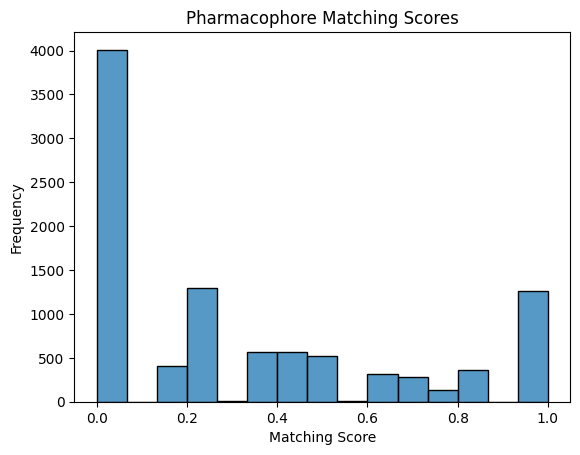

In [69]:
ax = sns.histplot(scores, bins=15)
# ax.bar_label('{:.2f} %'.format(ax.containers[0]))
ax.set_title('Pharmacophore Matching Scores')
ax.set_xlabel('Matching Score')
ax.set_ylabel('Frequency')
plt.savefig(generated_path + '_score_dist.png', dpi = 300)
plt.show()

/tmp/ipykernel_461785/3092308349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores, bins=10, kde=True)


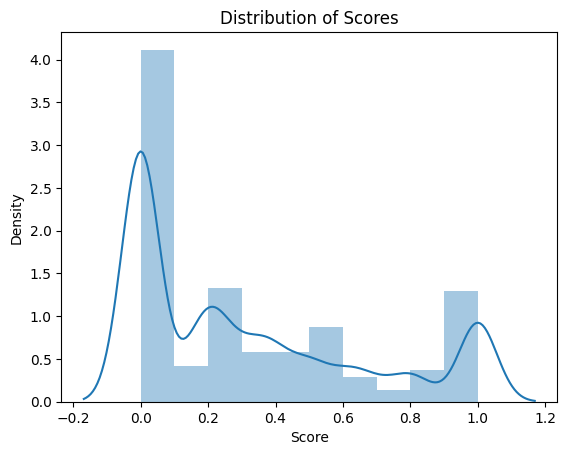

In [62]:
sns.distplot(scores, bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

In [64]:
score_df = pd.DataFrame.from_dict(score_dict, orient='index', columns=['score'])
score_df

,score
FC(F)(F)c1nnon1,0.000000
N#Cc1nnc(C#N)o1,0.000000
N#Cc1nonc1C#N,0.000000
[H]C#CC#CC(=O)C(=O)N([H])[H],0.000000
[H]C#CC#CC(=O)C([H])([H])C#C[H],0.200000
...,...
[H][N-][C@H]1O[C@]2([H])C([H])([H])[C@]12C([H])([H])C([H])([H])C([H])([H])[H],0.666667
[H][N-][C@H]1O[C@]2([H])[C@]3([H])N([H])[C@]3([H])[C@]12N([H])[H],0.000000
[H][N-][C@H]1[N@@H+]2C([H])([H])[C@]3([H])C([H])([H])[C@@]1(O[H])[C@]23[H],0.200000
[H][N-][C@H]1[N@H+]2[C@@]3(C([H])([H])[H])[C@]1([H])OC([H])([H])[C@@]23[H],0.500000
